# Telecom Churn Prediction

 > Developer - Muni

# Problem Statement

> In the telecommunication industry, customers tend to change operators if not provided with attractive schemes
and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. 
In this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data

# Business Objective
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. The given dataset contains customer-level informations for few consecutive months June, July & August they are encoded as 6,7 & 8. The business objective is to predict the cusotmer which will churn in next month by analyzing the dataset
High Value Customers:

One of the primary goal is to identify high value customers which are more likely to churn, as most of the profit comes from high value customers.
Customers which are likely to churn will starting decreasing rhe recharge amount and other facilities. To identify high value customers, total_rech_data can be calculated and total dataser can be filtered which are greater than 70th percentil of the data

 ## Steps:
- EDA
- Data Clearning and Missing Data Analysis
- Outlier Analysis & Treatment Assumption values > Q3+1.5IQR and values < Q1-1.5IQR will be treated
- Transforming Categorical Columns
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

> Model Preperation

- Training and Test data split
- Feature Scaling - StandardScaler
- Strategy steps
- Handle Imbalance dataset using SMOTE
- PCA - Dimensionality Reduction
- Case1 : 
- - Split train data into train and test split
- - Created below models using Hyper Parameter Tuning
- - - LOGISTICREGRESSION
- - - RANDOMFOREST
- - - ADABOOST
- - - XGBBOOST
- - - Made predictions by using combination of Random Forest + Adaboost + XGBOOST
- Case2 : 
- - Use entire train dataset for model building using K Cross Validation
- - Created below models on entire train set
- - - RANDOMFOREST
- - - ADABOOST
- - - XGBBOOST
- - - Made predictions by using combination of Random Forest + Adaboost + XGBOOST
- Model Evaluation & Assessment
- Prediction
- - - Made predictions on combination of case1 and case2 
- - - Important Features
- Conclusion & Analysis

# Load Library

In [360]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import Pipeline
from imblearn.metrics import sensitivity_specificity_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import IncrementalPCA
from xgboost import XGBClassifier
from sklearn import metrics

%matplotlib inline
import warnings 

warnings.filterwarnings("ignore")

# Data Load

In [361]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [362]:
pd.set_option('display.max_columns',500)

In [363]:
pd.set_option('display.max_rows',500)

In [364]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [365]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

# Data Overview

In [366]:
data.info(verbose=0, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


# Metadata Information

In [367]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  69999
Columns  :  172

Features : 
 ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_

# Data Cleaning - Missing Data Analysis & Treatment

In [368]:
## Dropping ID columns since all values are unique
## Dropping circle_id since all columns have value 109

data_v1 = data.drop(columns=['id','circle_id'])
test_v1 = test.drop(columns=['id','circle_id'])

In [369]:
    ## No of rows which have the all null values

print("No of rows = {} which have null values in all columns".format(data_v1.isnull().all(axis=1).sum()))

No of rows = 0 which have null values in all columns


In [370]:
    ## No of colummns which have the all null values

print("No of columns = {} which have null values in all rows".format(data_v1.isnull().all(axis=0).sum()))

No of columns = 0 which have null values in all rows


In [371]:
    # dropping columns which have null values in all the rows i.e. 100 % Null Values

data_v1.dropna(axis=1, how='all',inplace=True)
test_v1.dropna(axis=1, how='all',inplace=True)

In [372]:
    # Check Duplicate Rows - No Duplicate rows found

duplicate = data_v1[data_v1.duplicated()]

duplicate

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [373]:
## Dropping columns since these columns have single value only : 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
## 'std_ic_t2o_mou_7','std_ic_t2o_mou_8

data_v1 = data_v1.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)


test_v1 = test_v1.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [374]:
# data_v1['isd_og_mou_8'] = data_v1['isd_og_mou_8'].astype('str')
# data_v1['isd_og_mou_8'] = data_v1['isd_og_mou_8'].apply(lambda x : x.replace(' ',''))

In [375]:
data_v1.shape

## We have 69999 rows and 161 columns


(69999, 161)

In [376]:
# Percentage of Missing Columns
pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou

In [377]:
#Segregating cat , con and date columns
cat = []
con = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

dtcols = cat

cat = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

con = [column for column in con if column not in cat]

print("Numerical Columns" ,len(con),"\nCategorical Columns",len(cat),"\nDate Columns" ,len(dtcols))

Numerical Columns 134 
Categorical Columns 18 
Date Columns 9


## Missing Data Treatment Analysis Summary ##

> ### Replacing null values for below categorical variables with -1 considering no recharge has been made
- - 'night_pck_user_6', 'night_pck_user_8', 'night_pck_user_7','monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
- - 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7','monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
- - 'fb_user_6', 'fb_user_7', 'fb_user_8'

> ### Dropping these columns since percentage of missing values are more than 70 %

- - 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7','arpu_2g_8'

> ### Based on the analysis imputing null values in recharge_amount_columns list with 0 considereing no recharge has been made by the customer.
Also we can see that the min value of the recharge amount columns is 1

- - 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'

> ### Imputing Count recharge columns with zero considering no recharge has been made by the customer

- - 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

> ### Dropping below date columns since it will not be in use much and for other date columns we will be calculating age
- - 'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8'

> ### Replacing Missing age data with -1 considering no recharge has been made by the user

- - date_of_last_rech_6age date_of_last_rech_7age date_of_last_rech_8age

> ### For other Continuous columns missing values has been replaced with median since we have outliers

In [378]:
# Percentage of Missing Columns
pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou

In [379]:
# Replacing null values for below categorical variables with -1 considering no recharge has been made

data_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
data_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
data_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
data_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
data_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
data_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

test_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
test_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
test_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
test_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
test_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
test_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

In [380]:
#Analysing Average revenue Per User data
# Dropping these columns since percentage of missing values are more than 70 %
average_revenue_per_user = data.columns[data.columns.str.contains('arpu_3g|arpu_2g')]

pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
print("Before",round(100 * data_v1[average_revenue_per_user].isnull().sum()/len(data_v1.index),2))

data_v1 = data_v1.drop(columns=average_revenue_per_user,axis=1)

test_v1 = test_v1.drop(columns=average_revenue_per_user,axis=1)


Before arpu_3g_6    74.90
arpu_3g_7    74.48
arpu_3g_8    73.69
arpu_2g_6    74.90
arpu_2g_7    74.48
arpu_2g_8    73.69
dtype: float64


In [381]:
# Handling Missing Values Recharge Columns : 

recharge_amount_columns = data.columns[data.columns.str.contains('av_rech|total_rech_data|max_rech_data|amt_data')]

recharge_amount_columns

# List of recharge columns contain below information and percentage of missing values

# total_rech_data_6           74.90
# total_rech_data_7           74.48
# total_rech_data_8           73.69

# max_rech_data_6             74.90
# max_rech_data_7             74.48
# max_rech_data_8             73.69

# av_rech_amt_data_6          74.90
# av_rech_amt_data_7          74.48
# av_rech_amt_data_8          73.69

data_v1[recharge_amount_columns].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [382]:
# check - 'total_rech_data_6/7/8' and 'date_of_last_rech_data_6/7/8' both have null values at the same index. 

total_rech_data_6_index = data_v1['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = data_v1['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')
    
total_rech_data_7_index = data_v1['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = data_v1['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')
    
total_rech_data_8_index = data_v1['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = data_v1['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


- -  Based on the analysis imputing null values in recharge_amount_columns list with 0 considereing no recharge has been made by the customer.
- - Also we can see that the min value of the recharge amount columns is 1 

In [383]:
# Replacing the values with 0 
for column in recharge_amount_columns:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

# Check % of missing values after the imputation
round(100 * data_v1[recharge_amount_columns].isnull().sum()/len(data_v1.index),2)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [384]:
### Imputing Count recharge columns with zero considering no recharge has been made by the customer

In [385]:
# Replacing the values with 0

count_rech = data_v1.columns[data_v1.columns.str.contains('count_rech')]


for column in count_rech:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

# Check % of missing values after the imputation
round(100 * data_v1[count_rech].isnull().sum()/len(data_v1.index),2)

count_rech_2g_6    0.0
count_rech_2g_7    0.0
count_rech_2g_8    0.0
count_rech_3g_6    0.0
count_rech_3g_7    0.0
count_rech_3g_8    0.0
dtype: float64

In [386]:
#Dropping below date columns since it will not be in use much and for other date columns we will be calculating age
# 'last_date_of_month_6',
#  'last_date_of_month_7',
#  'last_date_of_month_8'

data_v1 = data_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)
test_v1 = test_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [387]:
dtcols.remove('last_date_of_month_6')
dtcols.remove('last_date_of_month_7')
dtcols.remove('last_date_of_month_8')

In [388]:
test_v1[dtcols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/26/2014,8/24/2014,NaN,NaN,NaN
1,6/19/2014,7/16/2014,8/24/2014,NaN,NaN,NaN
2,6/29/2014,7/27/2014,8/28/2014,NaN,NaN,NaN
3,6/25/2014,7/30/2014,8/24/2014,NaN,NaN,NaN
4,6/29/2014,7/29/2014,8/30/2014,NaN,NaN,NaN


In [389]:
# Handling date columns 
# Replacing Missing age data with -1 considering no recharge has been made by the user

for column in dtcols:
    colstr = column + 'age'
    print(colstr)
    data_v1[column] = pd.to_datetime(data_v1[column])
    data_v1[colstr] = data_v1[column].max() - data_v1[column]
    data_v1[colstr] = data_v1[colstr].dt.days
    data_v1 = data_v1.drop(columns=column,axis=1)
    data_v1[colstr] = data_v1[colstr].fillna(-1)
    

for column in dtcols:
    colstr = column + 'age'
    print(colstr)
    test_v1[column] = pd.to_datetime(test_v1[column])
    test_v1[colstr] = test_v1[column].max() - test_v1[column]
    test_v1[colstr] = test_v1[colstr].dt.days
    test_v1 = test_v1.drop(columns=column,axis=1)
    test_v1[colstr] = test_v1[colstr].fillna(-1)
    

date_of_last_rech_6age
date_of_last_rech_7age
date_of_last_rech_8age
date_of_last_rech_data_6age
date_of_last_rech_data_7age
date_of_last_rech_data_8age
date_of_last_rech_6age
date_of_last_rech_7age
date_of_last_rech_8age
date_of_last_rech_data_6age
date_of_last_rech_data_7age
date_of_last_rech_data_8age


In [390]:
#Segregating cat , con and date columns
cat = []
con = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

dtcols = cat

cat = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

con = [column for column in con if column not in cat]

print("Numerical Columns" ,len(con),"\nCategorical Columns",len(cat),"\nDate Columns" ,len(dtcols))

Numerical Columns 134 
Categorical Columns 18 
Date Columns 0


In [391]:
data_v1[con].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.2382

In [392]:
# Missing Value data treatment onnet_mou
onnet_mou = data_v1.columns[data_v1.columns.str.contains('onnet_mou')]

print(data_v1[onnet_mou].describe())

#Replacing the values with median since we have outliers here

for column in onnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())


        onnet_mou_6   onnet_mou_7   onnet_mou_8
count  67231.000000  67312.000000  66296.000000
mean     133.153275    133.894438    132.978257
std      299.963093    311.277193    311.896596
min        0.000000      0.000000      0.000000
25%        7.410000      6.675000      6.410000
50%       34.110000     32.280000     32.100000
75%      119.390000    115.837500    115.060000
max     7376.710000   8157.780000  10752.560000


In [393]:
# Missing Value data treatment offnet_mou
offnet_mou = data_v1.columns[data_v1.columns.str.contains('offnet_mou')]

#Replacing the values with median since we have outliers here

for column in offnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())



In [394]:
# Missing Value data treatment roaming
roam_col = data_v1.columns[data_v1.columns.str.contains('roam')]

#Replacing the values with median since we have outliers here

for column in roam_col:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())


In [395]:
# Missing Value data treatment roaming
local_calls = data_v1.columns[data_v1.columns.str.contains('loc')]

#Replacing the values with median since we have outliers here

for column in local_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [396]:
# Missing Value data treatment std
std_calls = data_v1.columns[data_v1.columns.str.contains('std')]

#Replacing the values with median since we have outliers here

for column in std_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [397]:
# Missing Value data treatment std
isd_calls = data_v1.columns[data_v1.columns.str.contains('isd')]

# #Replacing the values with median since we have outliers here

for column in isd_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [398]:
# Missing Value data treatment std
spl_list = data_v1.columns[data_v1.columns.str.contains('spl')]

# #Replacing the values with median since we have outliers here

for column in spl_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [399]:
# Missing Value data treatment std
other_list = data_v1.columns[data_v1.columns.str.contains('other')]

# #Replacing the values with median since we have outliers here

for column in other_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [400]:
print(data_v1.isnull().sum())

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [401]:

print ("Rows     : " ,data_v1.shape[0])
print ("Columns  : " ,data_v1.shape[1])
print ("\nFeatures : \n" ,data_v1.columns.tolist())
print ("\nMissing values :  ", data_v1.isnull().sum().values.sum())
print ("\nUnique values :  \n",data_v1.nunique())

Rows     :  69999
Columns  :  152

Features : 
 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou

In [402]:
data_v1[con].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.17373

In [403]:
print ("Rows     : " ,test_v1.shape[0])
print ("Columns  : " ,test_v1.shape[1])
print ("\nFeatures : \n" ,test_v1.columns.tolist())
print ("\nMissing values :  ", test_v1.isnull().sum().values.sum())
print ("\nUnique values :  \n",test_v1.nunique())

Rows     :  30000
Columns  :  151

Features : 
 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou

# Data Cleaning - Outlier Analysis¶

In [404]:
import warnings
warnings.filterwarnings("ignore")

In [405]:
col = ['churn_probability','date_of_last_rech_data_6age', 'date_of_last_rech_data_7age', 'date_of_last_rech_8age', 'date_of_last_rech_6age', 'date_of_last_rech_data_8age', 'date_of_last_rech_7age']

for i in col:
    con.remove(i)

In [406]:
# Outlier Analysis

outliers = []
out_cols = con
out_summary = []

for i in out_cols:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    if ((data_v1[i].min() < lower_bound) or (data_v1[i].max() > upper_bound)):
        out_summary.append("attribute \"{}\" with min value : {} -> max value : {} -> IQR {} -> lower_bound : {} match is {} -> upper_bound : {} match is {}".format(i,data_v1[i].min(),data_v1[i].max(),IQR,Q1-1.5*IQR,(data_v1[i].min() < lower_bound),Q3+1.5*IQR,data_v1[i].max() > upper_bound))
        outliers.append(i)


# List of outliers satisfying lower or upper bound        
for i in range(0,len(out_summary)):
    print("\nOutlier column with stats : \n\n{}\n".format(out_summary[i]))
    

#Outliers Treatment

for i in outliers:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    data_v1[i][data_v1[i]<=lower_bound] = lower_bound
    data_v1[i][data_v1[i]>=upper_bound] = upper_bound
    test_v1[i][test_v1[i]<=lower_bound] = lower_bound
    test_v1[i][test_v1[i]>=upper_bound] = upper_bound

print(outliers)

print("After outliers treatment\n\n",data_v1[out_cols].describe())


Outlier column with stats : 

attribute "arpu_6" with min value : -2258.709 -> max value : 27731.088 -> IQR 830.5226999999998 -> lower_bound : -1244.2840499999998 match is True -> upper_bound : 2077.8067499999997 match is True


Outlier column with stats : 

attribute "arpu_7" with min value : -1289.715 -> max value : 35145.834 -> IQR 822.3176999999982 -> lower_bound : -1232.5575499999973 match is True -> upper_bound : 2056.7132499999957 match is True


Outlier column with stats : 

attribute "arpu_8" with min value : -945.808 -> max value : 33543.624 -> IQR 828.4646999999984 -> lower_bound : -1242.6970499999975 match is False -> upper_bound : 2071.1617499999957 match is True


Outlier column with stats : 

attribute "onnet_mou_6" with min value : 0.0 -> max value : 7376.71 -> IQR 598.5999999999991 -> lower_bound : -897.8999999999987 match is False -> upper_bound : 1496.4999999999977 match is True


Outlier column with stats : 

attribute "onnet_mou_7" with min value : 0.0 -> max valu

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

# Deriving and Transforming Columns

In [407]:
data_v1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2,2.0,77,65.0,10,65,65,10,65,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,8.0,21.0,7.0,-1.0,-1.0,-1.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.65,18.725,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4,5.0,0,145.0,50,0,145,50,0,0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,18.0,21.0,5.0,-1.0,23.0,-1.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,9

# Filter High-Value Customers

## calculate total data recharge amount

In [408]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount

data_v1['total_data_rech_6'] = data_v1.total_rech_data_6 * data_v1.av_rech_amt_data_6
data_v1['total_data_rech_7'] = data_v1.total_rech_data_7 * data_v1.av_rech_amt_data_7


In [409]:
# add total data recharge and total recharge to get total combined recharge amount for a month
# calculate total recharge amount for June and July --> recharge amount + data recharge amount
data_v1['amt_data_6'] = data_v1.total_rech_amt_6 + data_v1.total_data_rech_6
data_v1['amt_data_7'] = data_v1.total_rech_amt_7 + data_v1.total_data_rech_7


In [410]:
# calculate average recharge done by customer in June and July
data_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2
test_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2


In [411]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data_v1.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [412]:
# Retain Customers who have made the recharge equivalent to 70th Percentile


data_v1_filtered = data_v1.loc[data_v1['av_amt_data_6_7'] >= data_v1['av_amt_data_6_7'].quantile(0.7),:]
data_v1_filtered = data_v1_filtered.reset_index(drop=True)
data_v1_filtered.shape

(21009, 157)

In [413]:
#Dropping variables that are used to filter high-value customers

data_v1_filtered = data_v1_filtered.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7'],axis=1)

In [414]:
data_v1_filtered.shape

(21009, 153)

In [415]:
data_v1_filtered['onnet_mou_diff'] = data_v1_filtered.onnet_mou_8 - ((data_v1_filtered.onnet_mou_6 + data_v1_filtered.onnet_mou_7)/2)

data_v1_filtered['offnet_mou_diff'] = data_v1_filtered.offnet_mou_8 - ((data_v1_filtered.offnet_mou_6 + data_v1_filtered.offnet_mou_7)/2)

data_v1_filtered['roam_ic_mou_diff'] = data_v1_filtered.roam_ic_mou_8 - ((data_v1_filtered.roam_ic_mou_6 + data_v1_filtered.roam_ic_mou_7)/2)

data_v1_filtered['roam_og_mou_diff'] = data_v1_filtered.roam_og_mou_8 - ((data_v1_filtered.roam_og_mou_6 + data_v1_filtered.roam_og_mou_7)/2)

data_v1_filtered['loc_og_mou_diff'] = data_v1_filtered.loc_og_mou_8 - ((data_v1_filtered.loc_og_mou_6 + data_v1_filtered.loc_og_mou_7)/2)

data_v1_filtered['std_og_mou_diff'] = data_v1_filtered.std_og_mou_8 - ((data_v1_filtered.std_og_mou_6 + data_v1_filtered.std_og_mou_7)/2)

data_v1_filtered['isd_og_mou_diff'] = data_v1_filtered.isd_og_mou_8 - ((data_v1_filtered.isd_og_mou_6 + data_v1_filtered.isd_og_mou_7)/2)

data_v1_filtered['spl_og_mou_diff'] = data_v1_filtered.spl_og_mou_8 - ((data_v1_filtered.spl_og_mou_6 + data_v1_filtered.spl_og_mou_7)/2)

data_v1_filtered['total_og_mou_diff'] = data_v1_filtered.total_og_mou_8 - ((data_v1_filtered.total_og_mou_6 + data_v1_filtered.total_og_mou_7)/2)

data_v1_filtered['loc_ic_mou_diff'] = data_v1_filtered.loc_ic_mou_8 - ((data_v1_filtered.loc_ic_mou_6 + data_v1_filtered.loc_ic_mou_7)/2)

data_v1_filtered['std_ic_mou_diff'] = data_v1_filtered.std_ic_mou_8 - ((data_v1_filtered.std_ic_mou_6 + data_v1_filtered.std_ic_mou_7)/2)

data_v1_filtered['isd_ic_mou_diff'] = data_v1_filtered.isd_ic_mou_8 - ((data_v1_filtered.isd_ic_mou_6 + data_v1_filtered.isd_ic_mou_7)/2)

data_v1_filtered['spl_ic_mou_diff'] = data_v1_filtered.spl_ic_mou_8 - ((data_v1_filtered.spl_ic_mou_6 + data_v1_filtered.spl_ic_mou_7)/2)

data_v1_filtered['total_ic_mou_diff'] = data_v1_filtered.total_ic_mou_8 - ((data_v1_filtered.total_ic_mou_6 + data_v1_filtered.total_ic_mou_7)/2)

data_v1_filtered['total_rech_num_diff'] = data_v1_filtered.total_rech_num_8 - ((data_v1_filtered.total_rech_num_6 + data_v1_filtered.total_rech_num_7)/2)

data_v1_filtered['total_rech_amt_diff'] = data_v1_filtered.total_rech_amt_8 - ((data_v1_filtered.total_rech_amt_6 + data_v1_filtered.total_rech_amt_7)/2)

data_v1_filtered['max_rech_amt_diff'] = data_v1_filtered.max_rech_amt_8 - ((data_v1_filtered.max_rech_amt_6 + data_v1_filtered.max_rech_amt_7)/2)

data_v1_filtered['total_rech_data_diff'] = data_v1_filtered.total_rech_data_8 - ((data_v1_filtered.total_rech_data_6 + data_v1_filtered.total_rech_data_7)/2)

data_v1_filtered['max_rech_data_diff'] = data_v1_filtered.max_rech_data_8 - ((data_v1_filtered.max_rech_data_6 + data_v1_filtered.max_rech_data_7)/2)

data_v1_filtered['av_rech_amt_data_diff'] = data_v1_filtered.av_rech_amt_data_8 - ((data_v1_filtered.av_rech_amt_data_6 + data_v1_filtered.av_rech_amt_data_7)/2)

data_v1_filtered['vol_2g_mb_diff'] = data_v1_filtered.vol_2g_mb_8 - ((data_v1_filtered.vol_2g_mb_6 + data_v1_filtered.vol_2g_mb_7)/2)

data_v1_filtered['vol_3g_mb_diff'] = data_v1_filtered.vol_3g_mb_8 - ((data_v1_filtered.vol_3g_mb_6 + data_v1_filtered.vol_3g_mb_7)/2)

In [416]:
test_v1['onnet_mou_diff'] = test_v1.onnet_mou_8 - ((test_v1.onnet_mou_6 + test_v1.onnet_mou_7)/2)

test_v1['offnet_mou_diff'] = test_v1.offnet_mou_8 - ((test_v1.offnet_mou_6 + test_v1.offnet_mou_7)/2)

test_v1['roam_ic_mou_diff'] = test_v1.roam_ic_mou_8 - ((test_v1.roam_ic_mou_6 + test_v1.roam_ic_mou_7)/2)

test_v1['roam_og_mou_diff'] = test_v1.roam_og_mou_8 - ((test_v1.roam_og_mou_6 + test_v1.roam_og_mou_7)/2)

test_v1['loc_og_mou_diff'] = test_v1.loc_og_mou_8 - ((test_v1.loc_og_mou_6 + test_v1.loc_og_mou_7)/2)

test_v1['std_og_mou_diff'] = test_v1.std_og_mou_8 - ((test_v1.std_og_mou_6 + test_v1.std_og_mou_7)/2)

test_v1['isd_og_mou_diff'] = test_v1.isd_og_mou_8 - ((test_v1.isd_og_mou_6 + test_v1.isd_og_mou_7)/2)

test_v1['spl_og_mou_diff'] = test_v1.spl_og_mou_8 - ((test_v1.spl_og_mou_6 + test_v1.spl_og_mou_7)/2)

test_v1['total_og_mou_diff'] = test_v1.total_og_mou_8 - ((test_v1.total_og_mou_6 + test_v1.total_og_mou_7)/2)

test_v1['loc_ic_mou_diff'] = test_v1.loc_ic_mou_8 - ((test_v1.loc_ic_mou_6 + test_v1.loc_ic_mou_7)/2)

test_v1['std_ic_mou_diff'] = test_v1.std_ic_mou_8 - ((test_v1.std_ic_mou_6 + test_v1.std_ic_mou_7)/2)

test_v1['isd_ic_mou_diff'] = test_v1.isd_ic_mou_8 - ((test_v1.isd_ic_mou_6 + test_v1.isd_ic_mou_7)/2)

test_v1['spl_ic_mou_diff'] = test_v1.spl_ic_mou_8 - ((test_v1.spl_ic_mou_6 + test_v1.spl_ic_mou_7)/2)

test_v1['total_ic_mou_diff'] = test_v1.total_ic_mou_8 - ((test_v1.total_ic_mou_6 + test_v1.total_ic_mou_7)/2)

test_v1['total_rech_num_diff'] = test_v1.total_rech_num_8 - ((test_v1.total_rech_num_6 + test_v1.total_rech_num_7)/2)

test_v1['total_rech_amt_diff'] = test_v1.total_rech_amt_8 - ((test_v1.total_rech_amt_6 + test_v1.total_rech_amt_7)/2)

test_v1['max_rech_amt_diff'] = test_v1.max_rech_amt_8 - ((test_v1.max_rech_amt_6 + test_v1.max_rech_amt_7)/2)

test_v1['total_rech_data_diff'] = test_v1.total_rech_data_8 - ((test_v1.total_rech_data_6 + test_v1.total_rech_data_7)/2)

test_v1['max_rech_data_diff'] = test_v1.max_rech_data_8 - ((test_v1.max_rech_data_6 + test_v1.max_rech_data_7)/2)

test_v1['av_rech_amt_data_diff'] = test_v1.av_rech_amt_data_8 - ((test_v1.av_rech_amt_data_6 + test_v1.av_rech_amt_data_7)/2)

test_v1['vol_2g_mb_diff'] = test_v1.vol_2g_mb_8 - ((test_v1.vol_2g_mb_6 + test_v1.vol_2g_mb_7)/2)

test_v1['vol_3g_mb_diff'] = test_v1.vol_3g_mb_8 - ((test_v1.vol_3g_mb_6 + test_v1.vol_3g_mb_7)/2)

In [417]:
test_v1.shape

(30000, 174)

In [418]:
data_v1_filtered.shape

(21009, 175)

In [419]:
data_v1_filtered.isnull().sum()

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [420]:
#Testing

In [421]:
data_v1_filtered.shape

(21009, 175)

# Print the correlation matrix again to analyze correlation coefficient between features

In [422]:
data_v1_filtered['churn_probability'].value_counts()

0    19272
1     1737
Name: churn_probability, dtype: int64

# Univariate Analysis

In [423]:
data_v1_filtered.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age,av_amt_data_6_7,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.00000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.00000

In [424]:
# Boxplot for categorical variables to see how they are related to sales price.
def plot_analysis(data_frame, vars):
    var_cats =  data_v1_filtered.columns[data_v1_filtered.columns.str.contains(vars)]
    print(var_cats)
    plt.figure(figsize=(15, 150))
    for i in enumerate(var_cats):
        plt.subplot(20, 2,i[0]+1)
        ax = sb.boxplot(data = data_frame, x=i[1], y='churn_probability') 
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) 
        ax.set_title(i[1] + " vs Churn prob.", fontsize=14) 
        ax.set_xlabel(i[1], fontsize=14)
        ax.set_ylabel("Churn Probability", fontsize=15)
    plt.show()

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

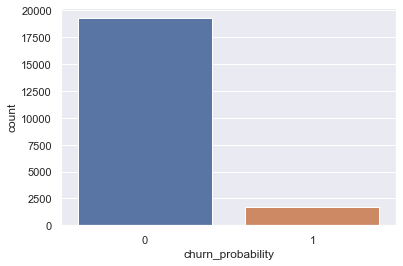

In [425]:
sb.countplot(x="churn_probability",data = data_v1_filtered)

# We can see that the we have the imbalanced dataset as percent of churn is quite low in compared to non churn

# Bivariate Analysis

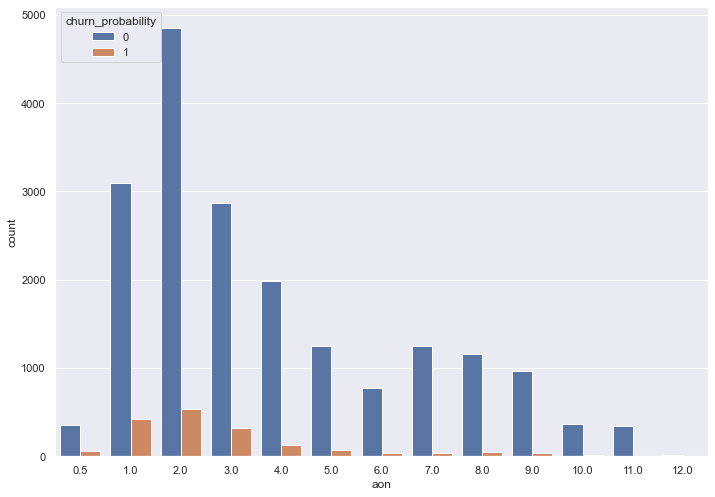

In [426]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sb.countplot(pd.cut(round(((data_v1_filtered['aon']/30)/12),1), bins = bins, labels = labels),hue = data_v1_filtered['churn_probability'])
plt.show()

# With the increase in age on network churn count is decreasing : - So if the customers is old his probability of getting churn will decrease

In [427]:
def colbox(cols):
    plt.figure(figsize=(40, 25))
    for i in range(len(cols)):
        plt.subplot(2,len(cols),i+1)
        K = pd.concat([data_v1_filtered[cols[i]],data_v1_filtered['churn_probability']], axis=1)
        K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = K)
        plt.xticks()    
        plt.suptitle('Incoming Calls Usage')
        plt.subplot(2,3,3+i+1)
        sb.distplot(data[cols[i]])

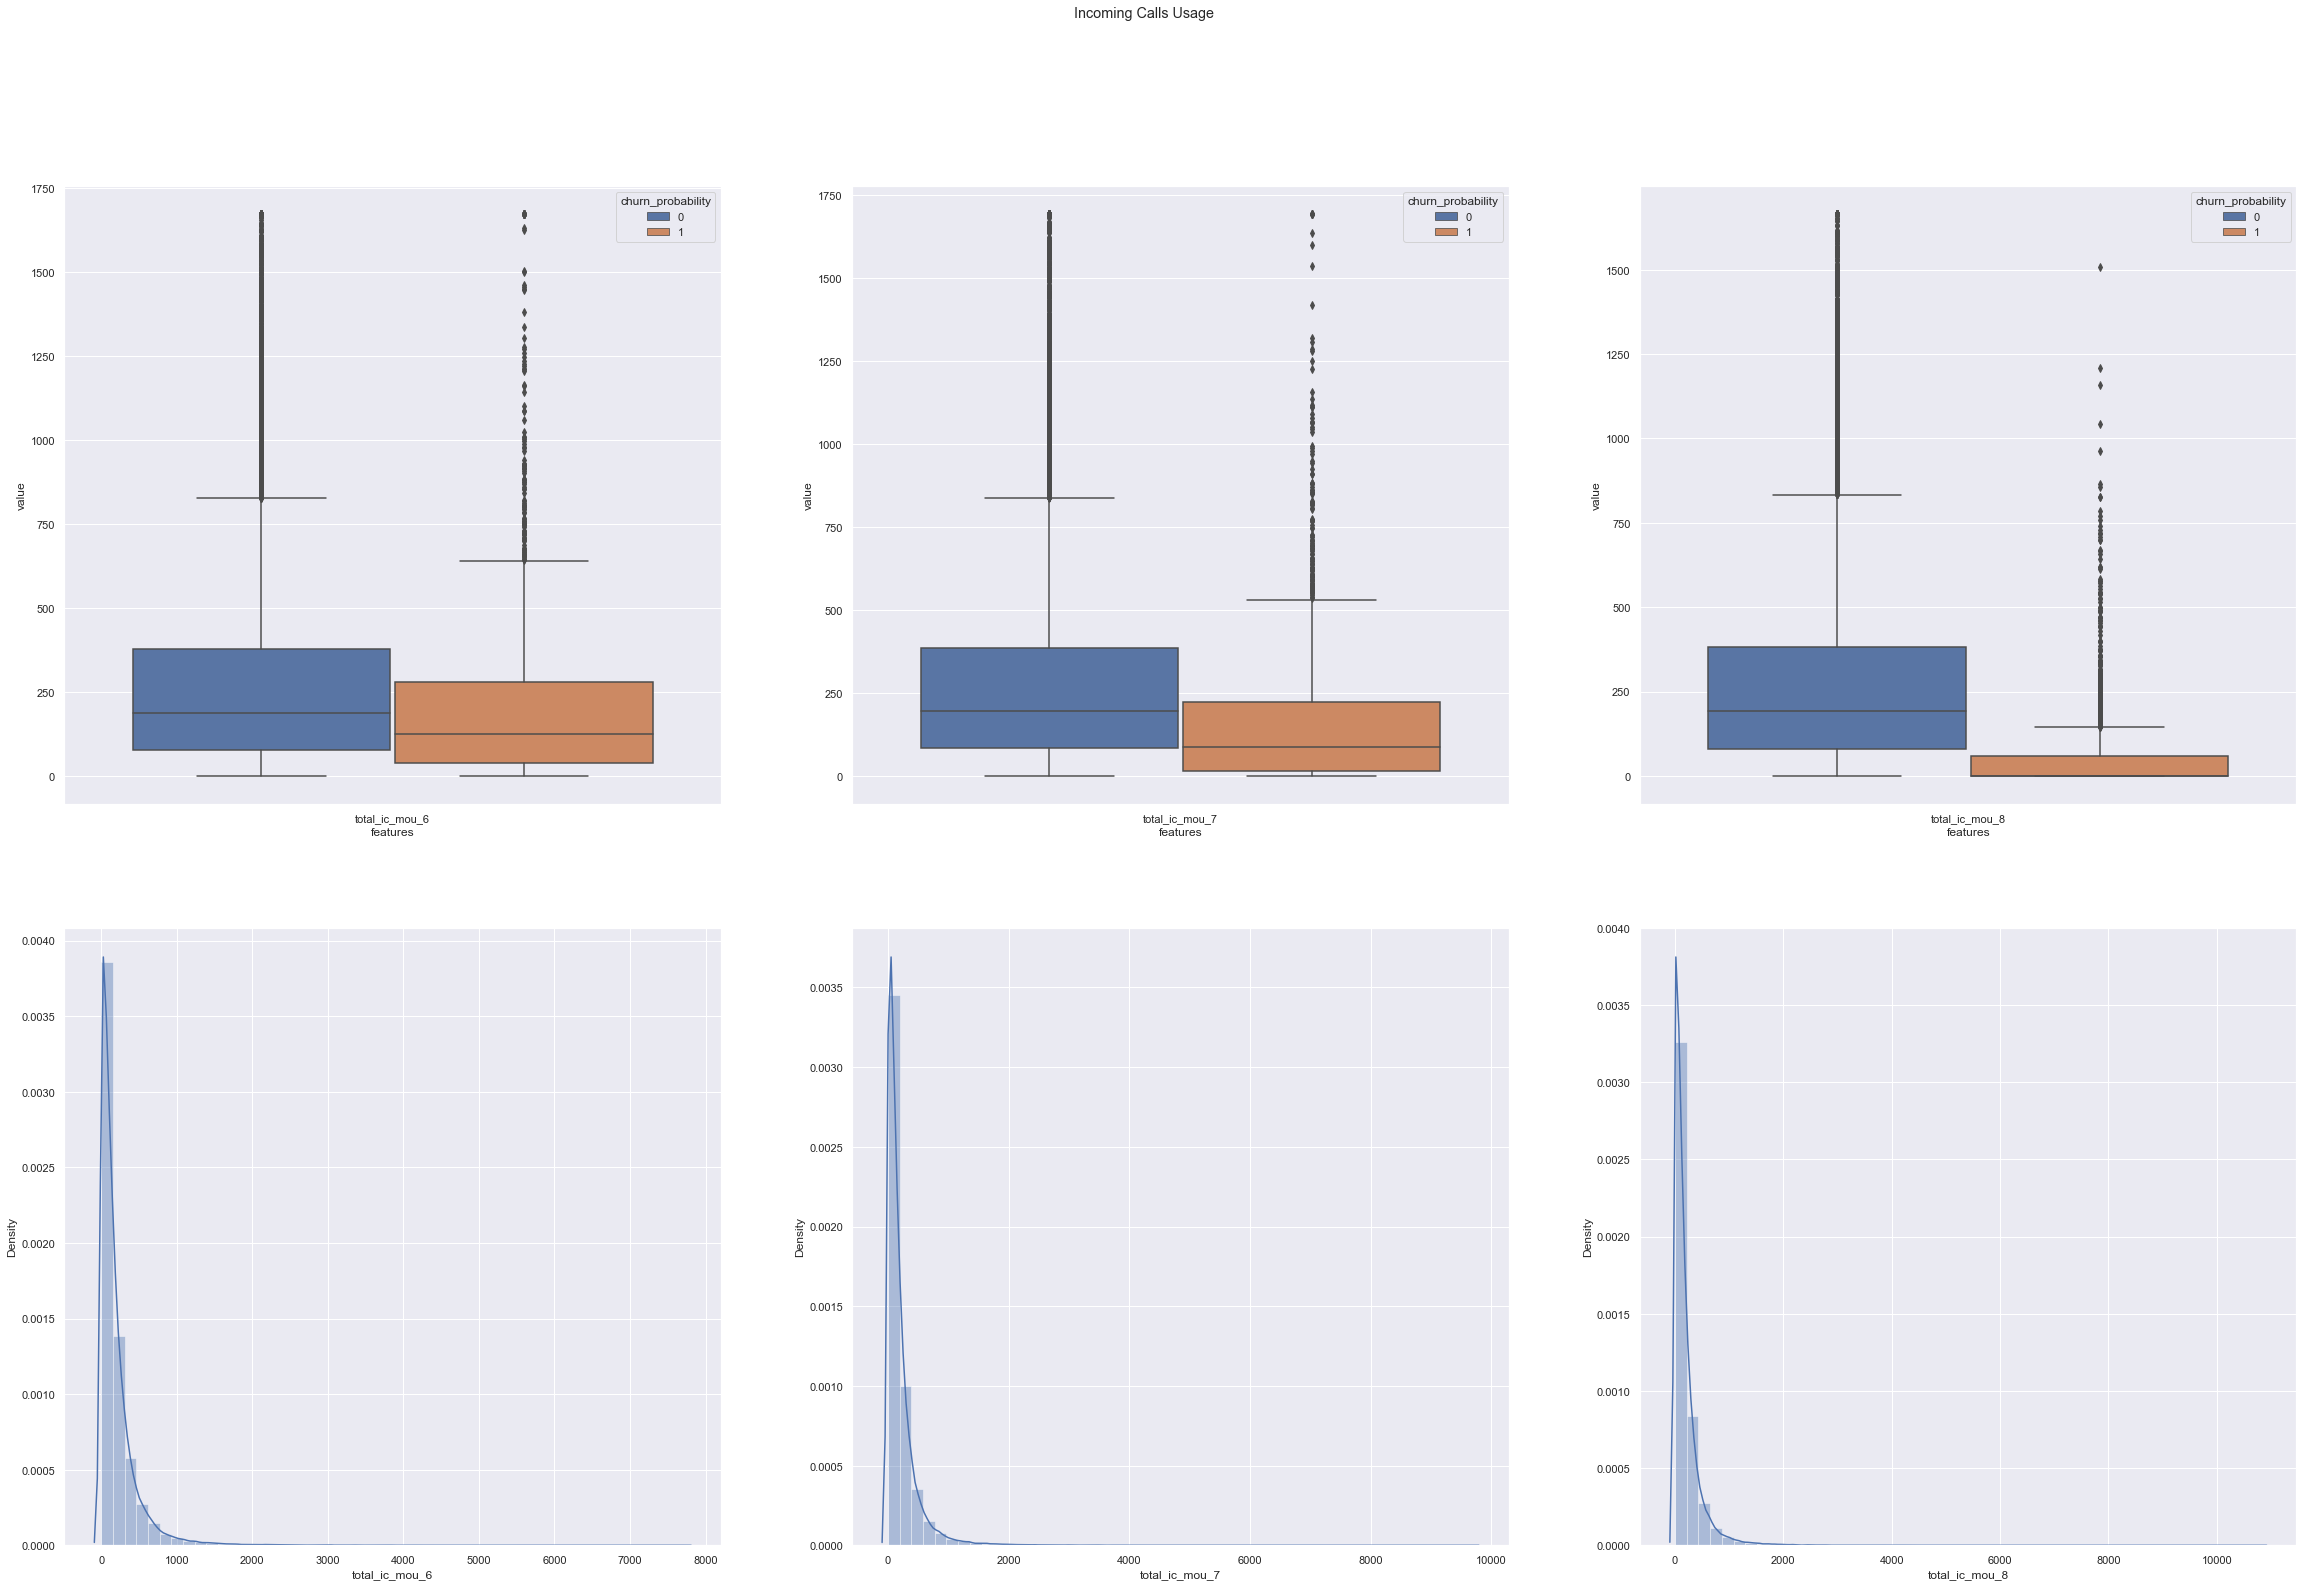

In [428]:
# Analysis : Incoming Minutes of Usage 
cols =["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]
colbox(cols)

# Inference : Total Minutes of usage for Incoming calls are skewed to left side 

# if the total MOU is more the probability of getting churned is less

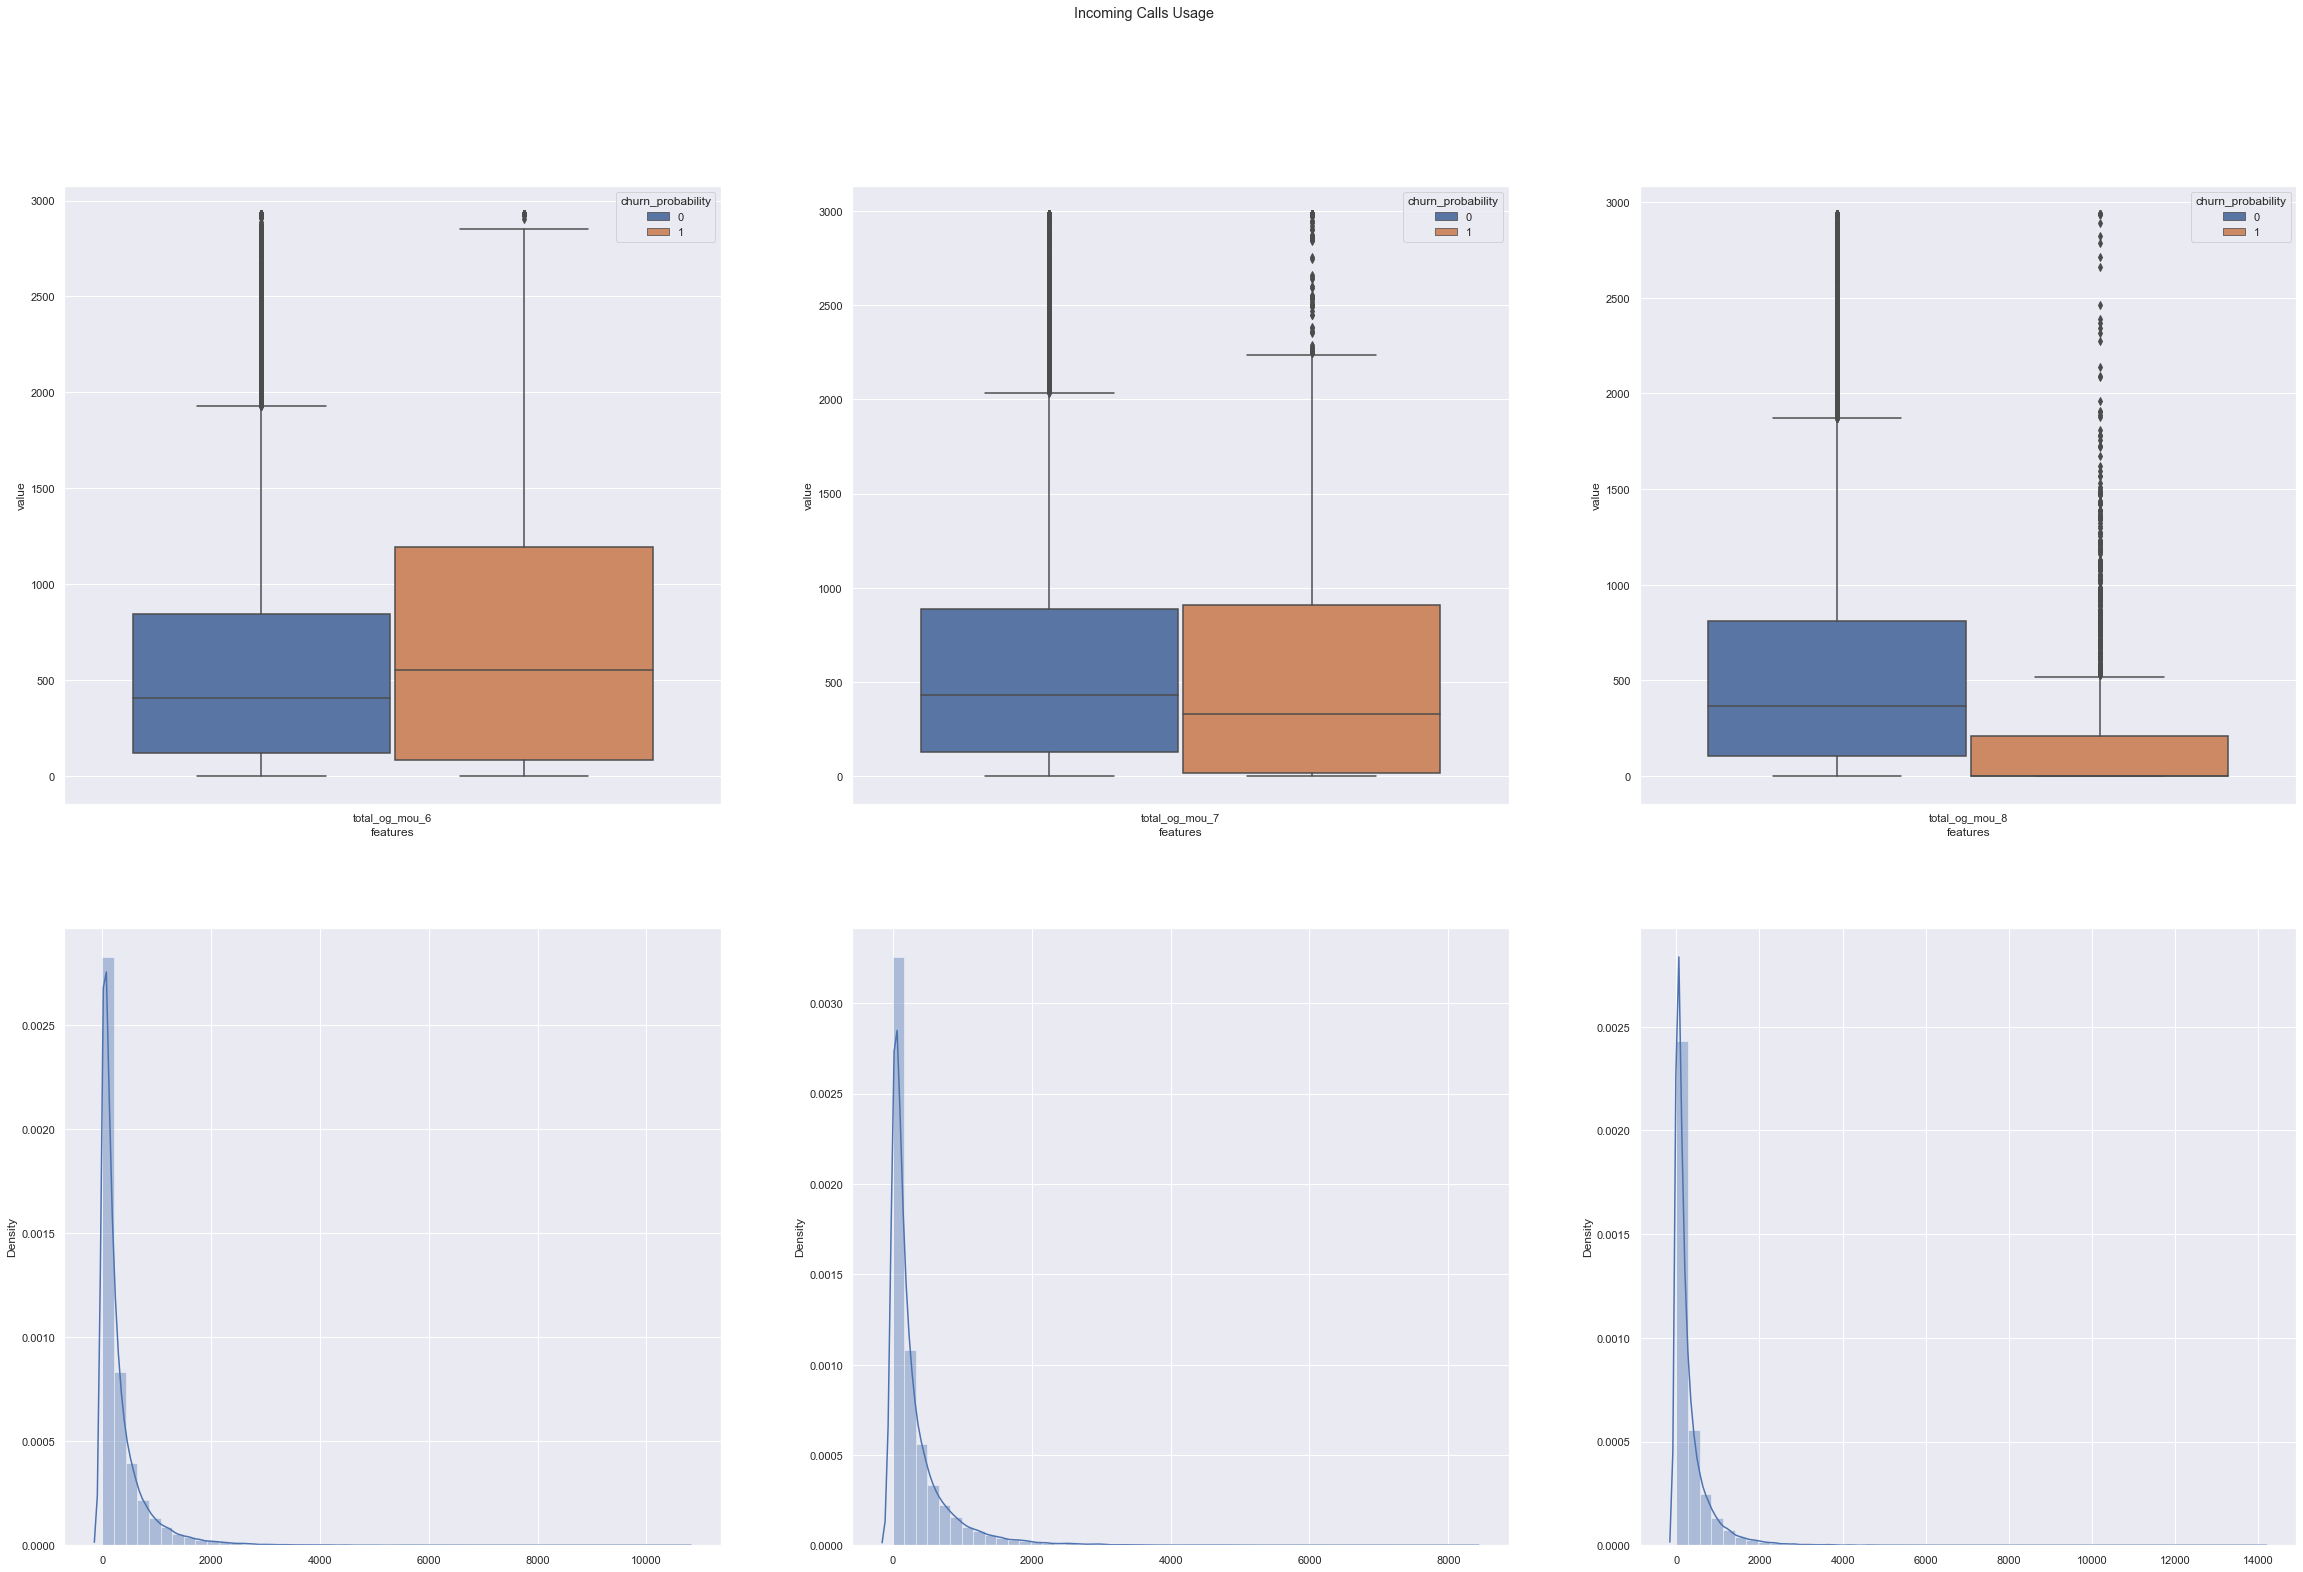

In [429]:
# Analysis : Outgoing Minutes of Usage 
cols = [['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
colbox(cols)

# If the amount of outgoing is increase can see for june and july month the amount of churn is relatively more

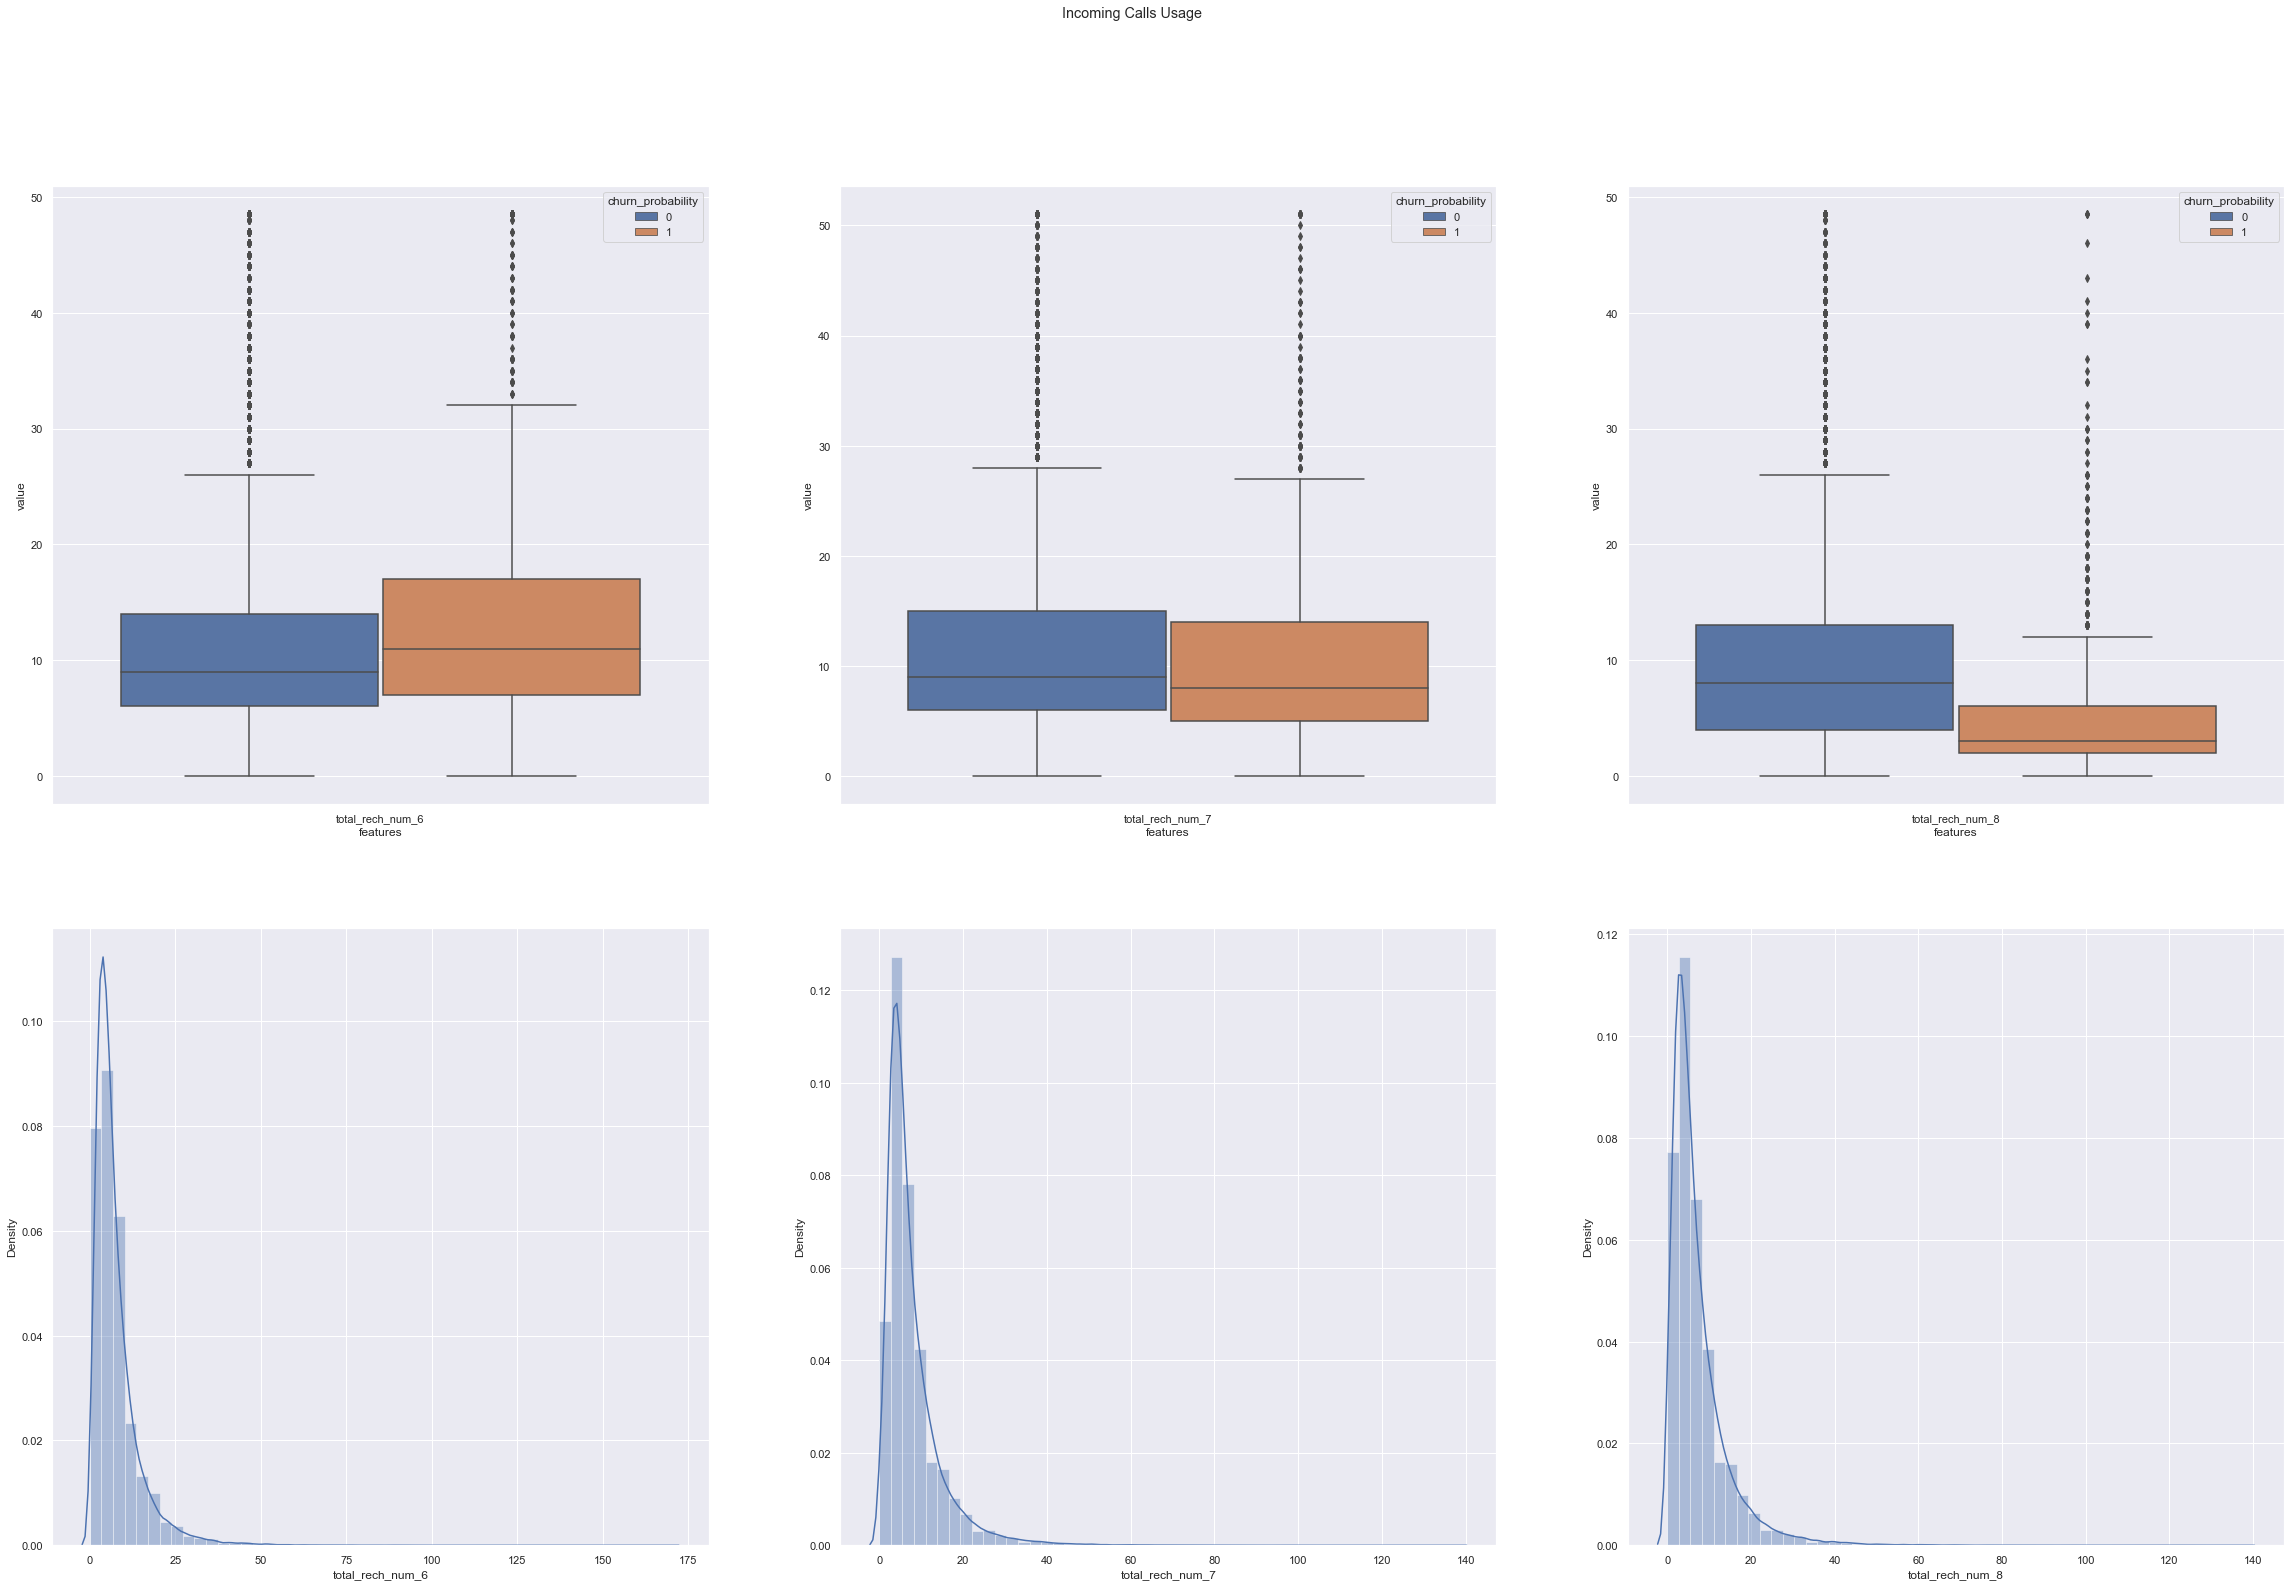

In [430]:
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
colbox(cols)

# Total Recharge Number Analysis 

# Can see for June month with the increase in total rechage number we had observed for more churn 


In [431]:
def Bivariate_box(cols):
    plt.figure(figsize=(60, 45))
    for i in range(0,7):
        plt.subplot(3,3,i+1)
        K = pd.concat([data_v1_filtered[cols[i]],data_v1_filtered['churn_probability']], axis=1)
        K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = K)
        plt.xticks()    
        plt.suptitle('2G-3G Volume')

In [432]:
def filter_columns(data_frame, prefix): 
    columns_with_prefix = []
    for col in data_frame.columns.tolist():
        if prefix in col: 
            columns_with_prefix.append(col) 
    return columns_with_prefix

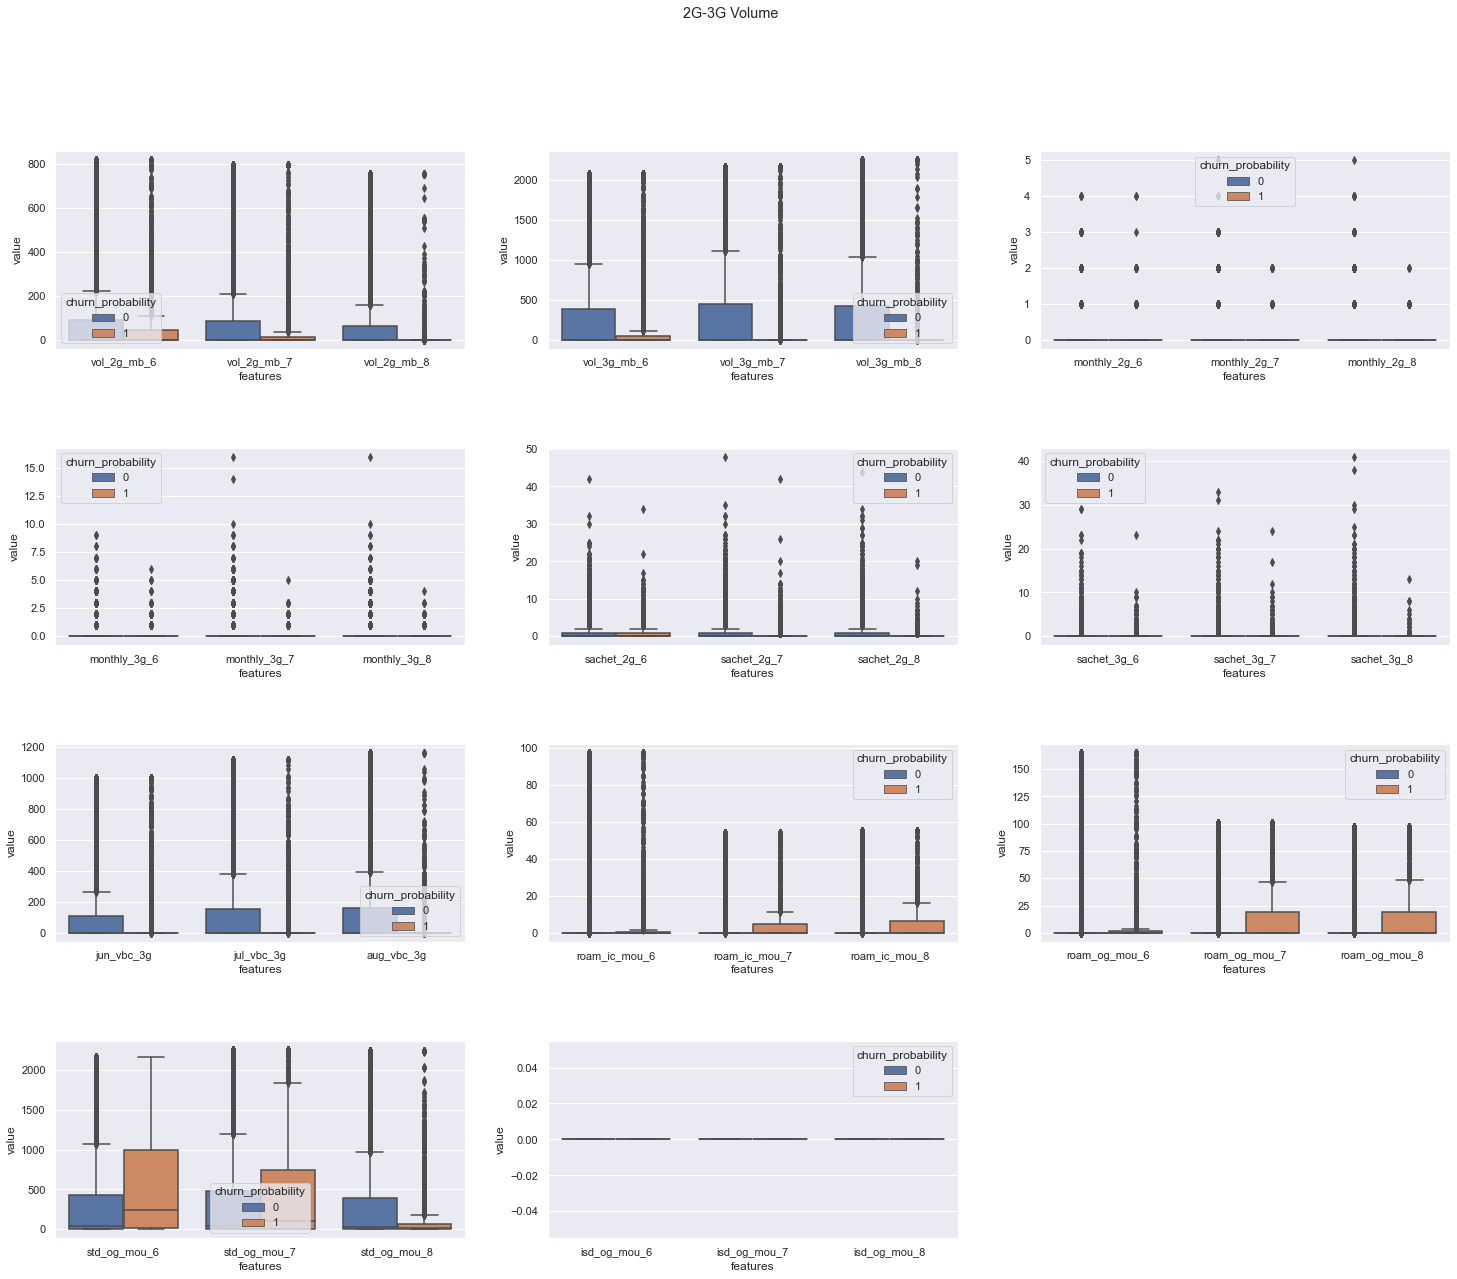

In [433]:
# WIth the increase in roaming churn is increasing
# With the increase outgoing std churn is more
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],
        ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],
        ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],
        ['std_og_mou_6','std_og_mou_7','std_og_mou_8'],
        ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
       ]
# plot for the 2g-3g volume
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
for i in range(0,11):
    plt.subplot(4,3,i+1)
    K = pd.concat([data_v1_filtered[cols[i]], data_v1_filtered['churn_probability']], axis=1)
    K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
    sb.boxplot(x="features", y="value", hue="churn_probability", data=K)
    plt.xticks()    
    plt.suptitle('2G-3G Volume')

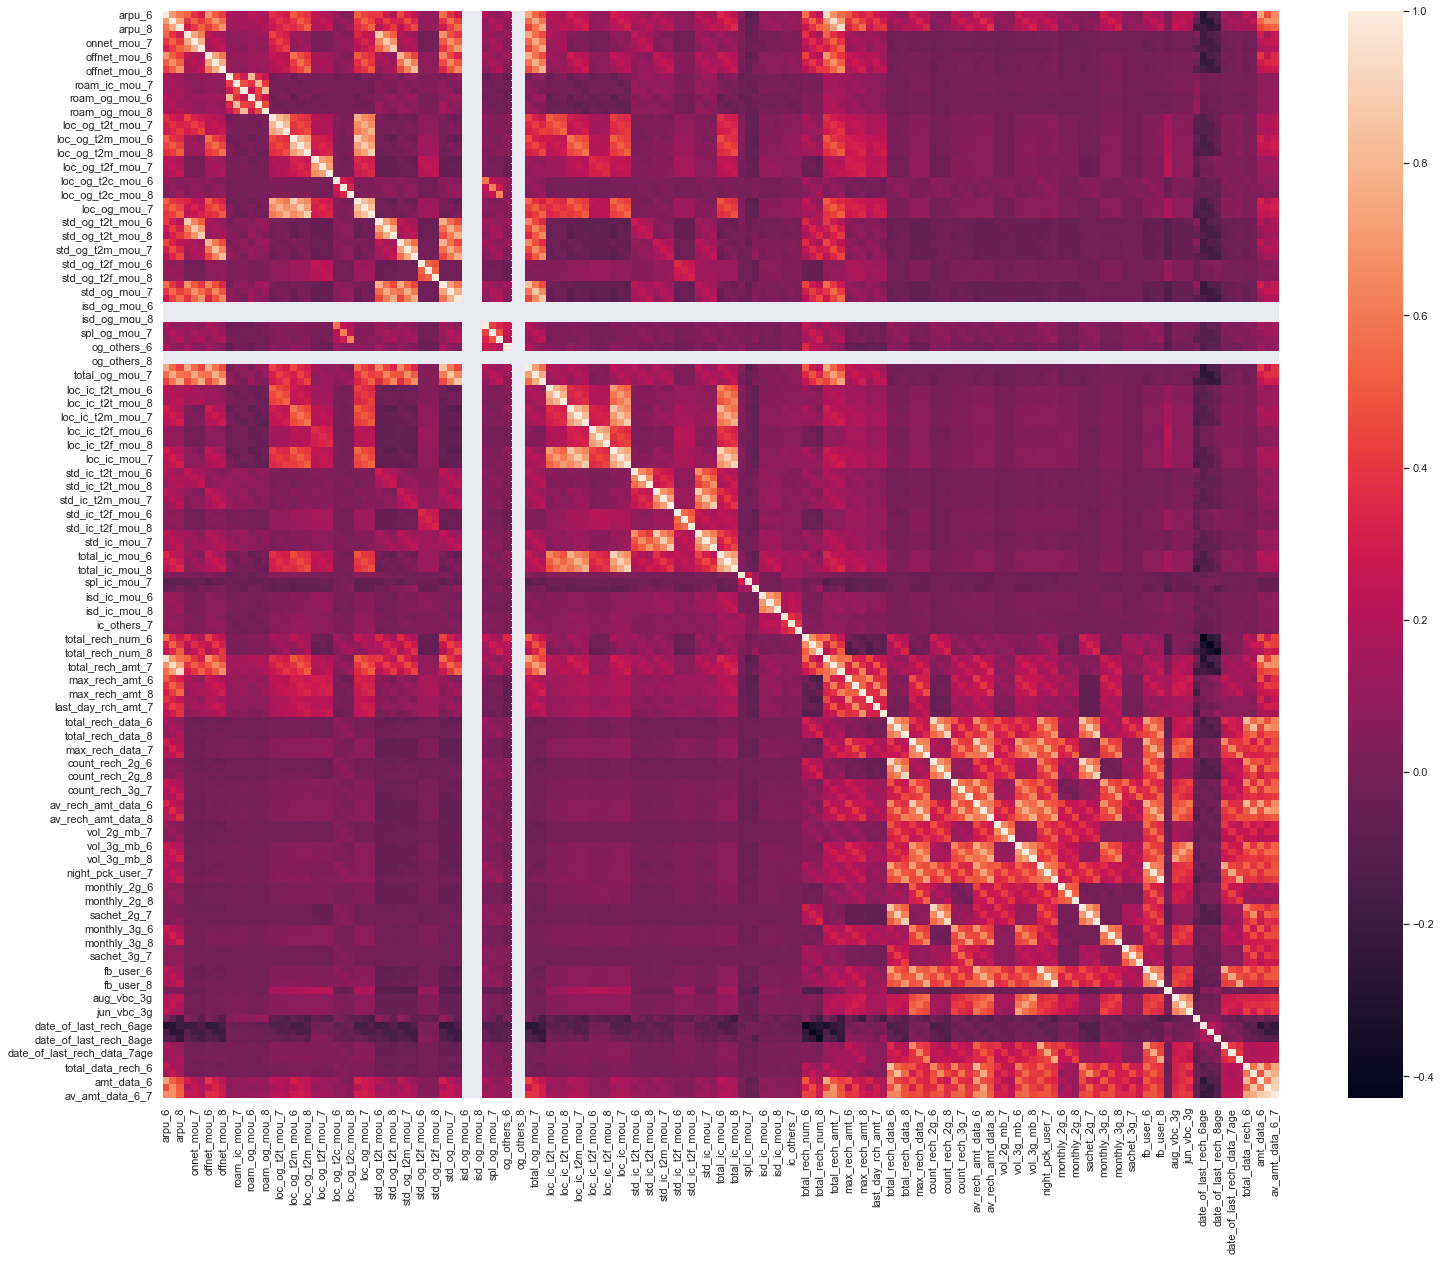

In [434]:
#Correlation Matrix

#Most of the features are highly correlated so we need to use PCA to handly multicollinearity and dimensionality reductions
plt.figure(figsize = (25, 20))

sb.heatmap(data_v1.corr())

plt.show()

In [76]:
#Spliting testing and training data 

X = data_v1_filtered.drop(["churn_probability"],1)
Y = data_v1_filtered.churn_probability

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [78]:
# Aggregating the Categorical Columns

train = pd.concat([xtrain, ytrain], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn_probability.mean())
print(train.groupby('night_pck_user_7').churn_probability.mean())
print(train.groupby('night_pck_user_8').churn_probability.mean())
print(train.groupby('fb_user_6').churn_probability.mean())
print(train.groupby('fb_user_7').churn_probability.mean())
print(train.groupby('fb_user_8').churn_probability.mean())

# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.107529, 0: 0.084044, 1: 0.127596},
           'night_pck_user_7' : {-1: 0.114231, 0: 0.065649, 1: 0.068750},
           'night_pck_user_8' : {-1: 0.126636, 0: 0.032644, 1: 0.034602},
           'fb_user_6'        : {-1: 0.107529, 0: 0.105496, 1: 0.083258},
           'fb_user_7'        : {-1: 0.114231, 0: 0.087029, 1: 0.063630},
           'fb_user_8'        : {-1: 0.126636, 0: 0.062458, 1: 0.029049}
          }
xtrain.replace(mapping, inplace = True)
xtest.replace(mapping, inplace = True)

night_pck_user_6
-1.0    0.098598
 0.0    0.068796
 1.0    0.113990
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.114313
 0.0    0.058338
 1.0    0.061538
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.142836
 0.0    0.030319
 1.0    0.023952
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.098598
 0.0    0.087838
 1.0    0.068459
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.114313
 0.0    0.068217
 1.0    0.057590
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.142836
 0.0    0.070238
 1.0    0.025385
Name: churn_probability, dtype: float64


In [79]:
data_v1_filtered.shape

(21009, 175)

# Principal Component Analysis

In [80]:
round(100*data_v1_filtered['churn_probability'].value_counts()/len(data_v1_filtered.index),2)

0    91.73
1     8.27
Name: churn_probability, dtype: float64

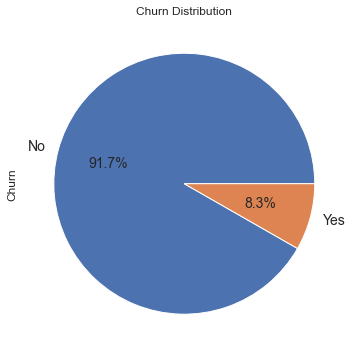

In [81]:
#Churn Distribution
pie_chart = data_v1_filtered['churn_probability'].value_counts()*100.0 /len(data_v1_filtered)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

# Data Scaling

In [82]:
# Scaling the data - Using Standard Scaler
col = list(xtrain.columns)
# Data Scaling
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
test_v1_scaled = scaler.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(xtrain)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# PCA

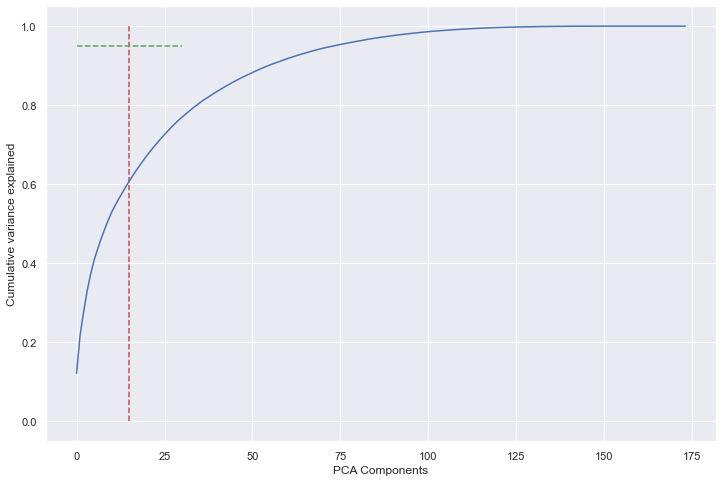

In [83]:
#  feature variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("PCA Components")
plt.show()

In [84]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.112303,0.065370,0.061337,arpu_6
1,0.117440,0.077487,0.133886,arpu_7
2,0.101265,0.107994,0.183459,arpu_8
3,0.113755,-0.037070,0.056799,onnet_mou_6
4,0.118836,-0.033277,0.096784,onnet_mou_7
5,0.112618,-0.010274,0.132415,onnet_mou_8
6,0.135125,0.015077,0.022687,offnet_mou_6
7,0.141081,0.018838,0.073701,offnet_mou_7
8,0.130695,0.046310,0.116258,offnet_mou_8
9,0.025091,0.009033,0.055146,roam_ic_mou_6


In [85]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.18, 21.77, 27.67, 32.98, 37.27, 40.86, 43.64, 46.28, 48.66,
       50.9 , 52.97, 54.68, 56.31, 57.85, 59.38, 60.82, 62.19, 63.54,
       64.82, 66.06, 67.28, 68.41, 69.5 , 70.54, 71.58, 72.58, 73.54,
       74.47, 75.35, 76.21, 76.99, 77.76, 78.49, 79.21, 79.9 , 80.58,
       81.21, 81.8 , 82.38, 82.96, 83.51, 84.04, 84.57, 85.08, 85.58,
       86.06, 86.52, 86.98, 87.41, 87.84, 88.25, 88.66, 89.06, 89.44,
       89.81, 90.16, 90.5 , 90.83, 91.16, 91.48, 91.78, 92.08, 92.38,
       92.66, 92.93, 93.19, 93.45, 93.7 , 93.94, 94.17, 94.39, 94.59,
       94.78, 94.97, 95.16, 95.34, 95.52, 95.7 , 95.87, 96.04, 96.21,
       96.37, 96.52, 96.67, 96.82, 96.96, 97.1 , 97.23, 97.35, 97.47,
       97.59, 97.71, 97.82, 97.93, 98.03, 98.13, 98.23, 98.32, 98.41,
       98.5 , 98.58, 98.66, 98.74, 98.81, 98.88, 98.94, 99.  , 99.06,
       99.12, 99.18, 99.23, 99.28, 99.33, 99.38, 99.43, 99.47, 99.51,
       99.55, 99.58, 99.61, 99.64, 99.67, 99.7 , 99.72, 99.74, 99.76,
       99.78, 99.8 ,

# 75 variables are enough to describe 95 % of the variance in the dataset hence selecting 75 variables for our modelling

# Handling imbalance dataset using Smote 

In [86]:
print("Applying SMOTE to normalize imbalance ")

smote = SMOTE(.8)
x_smote,y_smote = smote.fit_sample(xtrain_scaled,ytrain)
print("Shape of train datatset after SMOTE : "+ str(x_smote.shape))

# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=75)    
x_train_smote_pca = pca.fit_transform(x_smote)
x_test_smote_pca = pca.transform(xtest_scaled)
test_v1_scaled_pca = pca.transform(test_v1_scaled)


Applying SMOTE to normalize imbalance 
Shape of train datatset after SMOTE : (24282, 174)


In [87]:
print("Shape of train datatset after PCA : "+str(x_train_smote_pca.shape))

Shape of train datatset after PCA : (24282, 75)


# After Smote the Shape of train datatset after PCA : (27040, 75)

In [88]:
x_test_smote_pca.shape

(6303, 75)

In [89]:
from collections import Counter

print(Counter(ytrain))
print(Counter(y_smote))

Counter({0: 13490, 1: 1216})
Counter({0: 13490, 1: 10792})


# Function to Evaluate metrics`m

In [90]:
def evaluate_model(dt_classifier,ytrain,ytest,xtrain,xtest):
    print("Train Accuracy :", accuracy_score(ytrain, dt_classifier.predict(xtrain)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(ytrain, dt_classifier.predict(xtrain)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(ytest, dt_classifier.predict(xtest)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(ytest, dt_classifier.predict(xtest)))
    print("recall_score",round(metrics.recall_score(ytest,dt_classifier.predict(xtest)),2))
    print("precision_score",round(metrics.precision_score(ytest,dt_classifier.predict(xtest)),2))
    print("auc",round(metrics.roc_auc_score(ytest,dt_classifier.predict(xtest)),2))
    print("f1",round(metrics.f1_score(ytest,dt_classifier.predict(xtest)),2))
    sensitivity, specificity, _ = sensitivity_specificity_support(ytest, dt_classifier.predict(xtest), average='binary')
    print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Model Creation 

## Model 1 : Logistic Regression Without hyperparameter tuning

In [91]:
# Logistic Regression without Hyper Parameter Turning

#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(x_train_smote_pca,y_smote)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test_smote_pca)[:,1]
print("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(ytest, pred_probs_test)))
evaluate_model(lr,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Logistic Regression Accurancy : 0.88
Train Accuracy : 0.8641380446421217
Train Confusion Matrix:
[[11666  1824]
 [ 1475  9317]]
--------------------------------------------------
Test Accuracy : 0.8573695065841662
Test Confusion Matrix:
[[5015  767]
 [ 132  389]]
recall_score 0.75
precision_score 0.34
auc 0.81
f1 0.46
Sensitivity: 	0.75
Specificity: 	0.87


## Model 2 : Logistic Regression With hyperparameter tuning

In [92]:
# Logistic Regression with Hyper Parameter Turning

logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
lrmodel = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
lrmodel.fit(x_train_smote_pca, y_smote)

# print best hyperparameters
print("Best AUC: ", lrmodel.best_score_)
print("Best hyperparameters: ", lrmodel.best_params_)

evaluate_model(lrmodel,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.0s finished


Best AUC:  0.9242345739273599
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Train Accuracy : 0.8641792274112511
Train Confusion Matrix:
[[11667  1823]
 [ 1475  9317]]
--------------------------------------------------
Test Accuracy : 0.8575281611930826
Test Confusion Matrix:
[[5016  766]
 [ 132  389]]
recall_score 0.75
precision_score 0.34
auc 0.81
f1 0.46
Sensitivity: 	0.75
Specificity: 	0.87


##  Inferences : Logistic Regression before tuning its giving 89 % accurancy and after tuning it is giving 92 % accuracy 


# Model 3 : Random Forest without hyperparameter tuning

In [93]:
# Random Forest

rfc = RandomForestClassifier()
rfc.fit(x_train_smote_pca,y_smote)


evaluate_model(rfc,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9130572743138188
Test Confusion Matrix:
[[5553  229]
 [ 319  202]]
recall_score 0.39
precision_score 0.47
auc 0.67
f1 0.42
Sensitivity: 	0.39
Specificity: 	0.96


In [94]:
# Tuning 1 - Random Forest Classifier

# run a random forest model on train data
max_features = int(round(np.sqrt(xtrain.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

rf_model.fit(x_train_smote_pca, y_smote)

print("OOB Score",rf_model.oob_score_)

evaluate_model(rfc,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

13


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


OOB Score 0.9542047607281113
Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9130572743138188
Test Confusion Matrix:
[[5553  229]
 [ 319  202]]
recall_score 0.39
precision_score 0.47
auc 0.67
f1 0.42
Sensitivity: 	0.39
Specificity: 	0.96


# Random Forest with Hyper Parameter Tuning

In [95]:
# Tuning 2 - Random Forest Classifier - Max Depth

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': range(2, 40, 5)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   57.9s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1, param_grid={'max_depth': range(2, 40, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [96]:
evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

Train Accuracy : 0.9986821513878593
Train Confusion Matrix:
[[13458    32]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9119466920514041
Test Confusion Matrix:
[[5531  251]
 [ 304  217]]
recall_score 0.42
precision_score 0.46
auc 0.69
f1 0.44
Sensitivity: 	0.42
Specificity: 	0.96


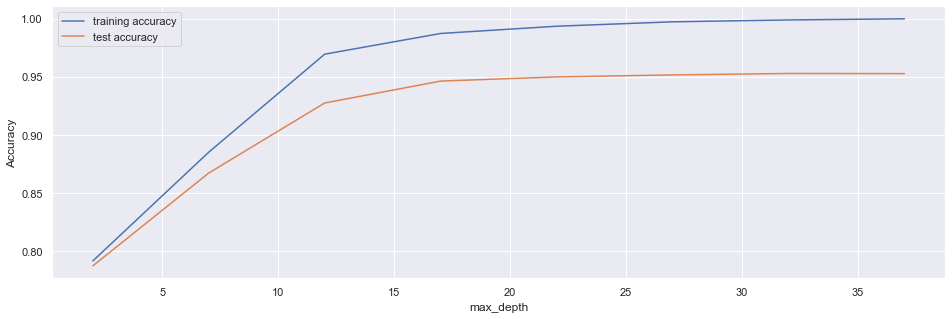

In [97]:
for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# From the above plot max depth can be12 or 18 since after 18 graph become constant

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.6min finished


Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.912739965095986
Test Confusion Matrix:
[[5542  240]
 [ 310  211]]
recall_score 0.4
precision_score 0.47
auc 0.68
f1 0.43
Sensitivity: 	0.4
Specificity: 	0.96


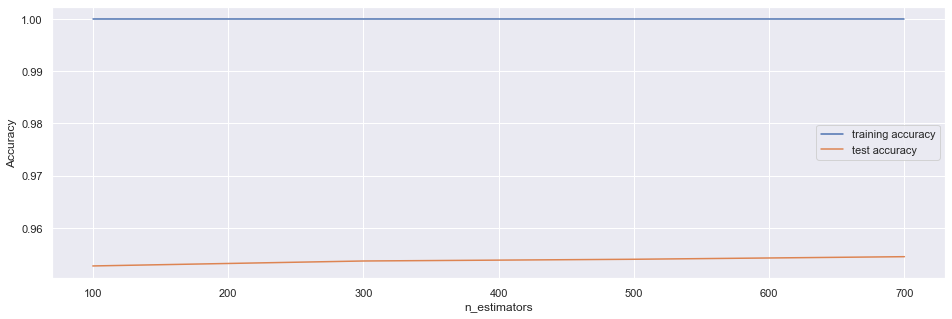

In [98]:
# Tuning 3 - Random Forest Classifier - parameters = {'n_estimators': range(100, 2000, 200)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'n_estimators': range(100, 800, 200)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# n_estimators seems to be constant lets take 200

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.2min finished


Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.913533238140568
Test Confusion Matrix:
[[5514  268]
 [ 277  244]]
recall_score 0.47
precision_score 0.48
auc 0.71
f1 0.47
Sensitivity: 	0.47
Specificity: 	0.95


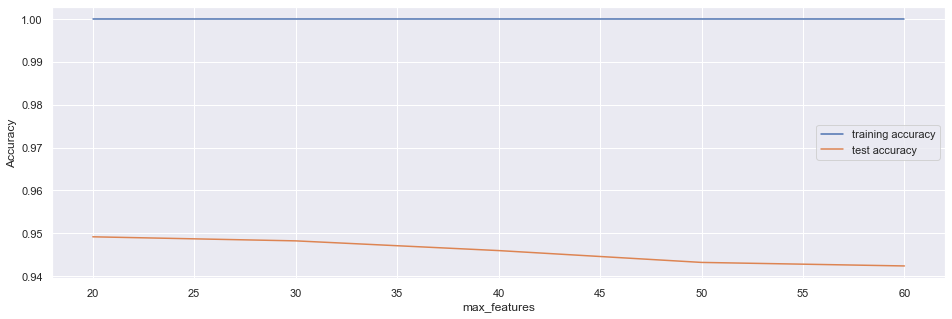

In [99]:
# Tuning 4 - Random Forest Classifier - parameters = {'max_features': [20,30,40,50,60]}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_features': [20,30,40,50,60]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Lets take max features as 40 since after this graph started declining

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9111534190068221
Test Confusion Matrix:
[[5536  246]
 [ 314  207]]
recall_score 0.4
precision_score 0.46
auc 0.68
f1 0.43
Sensitivity: 	0.4
Specificity: 	0.96


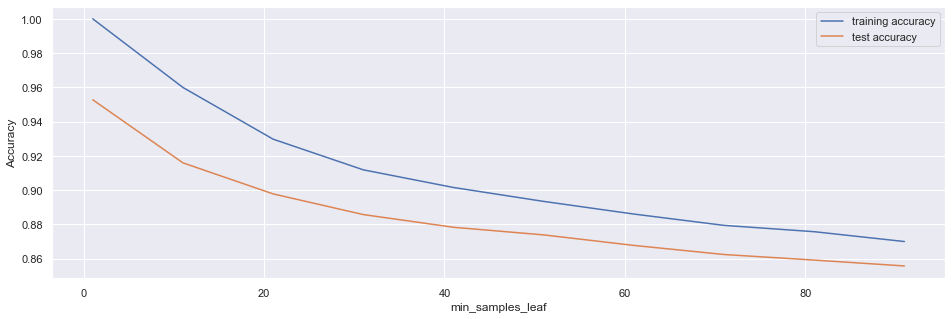

In [100]:
# Tuning 5 - Random Forest Classifier - parameters = {'min_samples_leaf': range(1, 100, 10)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'min_samples_leaf': range(1, 100, 10)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model may start to overfit accuracy is decreasing with min sample leaf lets take it 20

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished


Train Accuracy : 0.9985586030804712
Train Confusion Matrix:
[[13464    26]
 [    9 10783]]
--------------------------------------------------
Test Accuracy : 0.9132159289227352
Test Confusion Matrix:
[[5531  251]
 [ 296  225]]
recall_score 0.43
precision_score 0.47
auc 0.69
f1 0.45
Sensitivity: 	0.43
Specificity: 	0.96


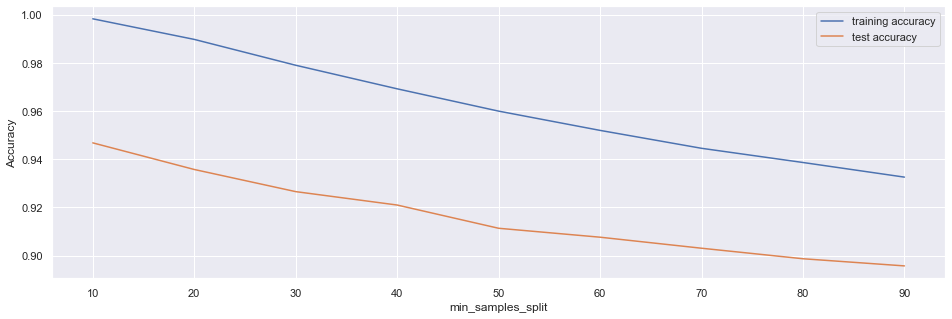

In [101]:
# Tuning 6 - Random Forest Classifier - parameters = {'min_samples_split': range(10, 100, 10)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'min_samples_split': range(10, 100, 10)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# take min_samples_split as 40 after this plot start decreasing

In [102]:
# Tuning 6 - Random Forest Classifier - parameters = # Final Model after all the tuning

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [12],
    'min_samples_split' : [40],
    'min_samples_leaf' : [10,20],
    'max_features' : [40],
    'n_estimators' : [200]
}

rf_final_model = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
rf_final_model.fit(x_train_smote_pca, y_smote)

evaluate_model(rf_final_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(rf_final_model.cv_results_)


Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.9min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.9min finished


Train Accuracy : 0.9406144469154106
Train Confusion Matrix:
[[12687   803]
 [  639 10153]]
--------------------------------------------------
Test Accuracy : 0.8975091226400127
Test Confusion Matrix:
[[5317  465]
 [ 181  340]]
recall_score 0.65
precision_score 0.42
auc 0.79
f1 0.51
Sensitivity: 	0.65
Specificity: 	0.92


# Inference Random Forest Model - This is the best that we got from random forest after hyperparameter tuning 

> Train Accuracy : 94.1 

> Test Accuracy : 89.0 , Recall : 0.79 and precision 0.42

# MODEL 4 : ADABOOST

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
from sklearn.ensemble import AdaBoostClassifier
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(x_train_smote_pca, y_smote)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [105]:
print('Accuracy of the Train model is:  ',accuracy_score(y_smote, adaboost.predict(x_train_smote_pca)))
print('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(x_test_smote_pca)))

Accuracy of the Train model is:   0.8853883535128902
Accuracy of the Test model is:   0.8638743455497382


In [106]:
evaluate_model(adaboost,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 0.8853883535128902
Train Confusion Matrix:
[[12073  1417]
 [ 1366  9426]]
--------------------------------------------------
Test Accuracy : 0.8638743455497382
Test Confusion Matrix:
[[5105  677]
 [ 181  340]]
recall_score 0.65
precision_score 0.33
auc 0.77
f1 0.44
Sensitivity: 	0.65
Specificity: 	0.88


# Model 5 : ADABOOST : xtrain and y train directly without using PCA

In [107]:
from sklearn.ensemble import AdaBoostClassifier
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [108]:
print('Accuracy of the Train model is:  ',accuracy_score(ytrain, adaboost.predict(xtrain)))
print('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(xtest)))

Accuracy of the Train model is:   0.9471644226846185
Accuracy of the Test model is:   0.9370141202601936


In [109]:
evaluate_model(adaboost,ytrain,ytest,xtrain,xtest)

Train Accuracy : 0.9471644226846185
Train Confusion Matrix:
[[13234   256]
 [  521   695]]
--------------------------------------------------
Test Accuracy : 0.9370141202601936
Test Confusion Matrix:
[[5665  117]
 [ 280  241]]
recall_score 0.46
precision_score 0.67
auc 0.72
f1 0.55
Sensitivity: 	0.46
Specificity: 	0.98


In [110]:
# Hyperparameter Tuning Adaboost
params = {
        'n_estimators' : [50,100, 200], # no of trees   # eta
        'algorithm': ['SAMME', 'SAMME.R'],
        }

folds = 5

param_comb = 800

random_search_ada = RandomizedSearchCV(adaboost, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search_ada.fit(xtrain, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   57.7s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=1),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=3)

In [111]:
print('Accuracy of the Train model is:  ',accuracy_score(ytrain, random_search_ada.predict(xtrain)))
print('Accuracy of the Test model is:  ',accuracy_score(ytest, random_search_ada.predict(xtest)))

Accuracy of the Train model is:   0.94281245750034
Accuracy of the Test model is:   0.9381247025226083


In [112]:
evaluate_model(random_search_ada,ytrain,ytest,xtrain,xtest)

Train Accuracy : 0.94281245750034
Train Confusion Matrix:
[[13230   260]
 [  581   635]]
--------------------------------------------------
Test Accuracy : 0.9381247025226083
Test Confusion Matrix:
[[5669  113]
 [ 277  244]]
recall_score 0.47
precision_score 0.68
auc 0.72
f1 0.56
Sensitivity: 	0.47
Specificity: 	0.98


In [113]:
print('\n Best estimator:')
print(random_search_ada.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_ada.best_score_ )
print('\n Best hyperparameters:')
print(random_search_ada.best_params_)


 Best estimator:
AdaBoostClassifier(algorithm='SAMME', n_estimators=200, random_state=1)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9399567658627838

 Best hyperparameters:
{'n_estimators': 200, 'algorithm': 'SAMME'}


# Best Accuracy that we got from adaboost is 94% on train and 93.9 % percent on test data with recall score of 52 % and precision score of 71 %

# XGBBOOST

In [114]:
### XG Boost - Model 1 
# fit model on training data with default hyperparameters

model = XGBClassifier()
model.fit(x_train_smote_pca, y_smote)
evaluate_model(model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 0.9994646240013179
Train Confusion Matrix:
[[13478    12]
 [    1 10791]]
--------------------------------------------------
Test Accuracy : 0.9079803268284944
Test Confusion Matrix:
[[5457  325]
 [ 255  266]]
recall_score 0.51
precision_score 0.45
auc 0.73
f1 0.48
Sensitivity: 	0.51
Specificity: 	0.94


# Lets Fine tune the model for improved accuracy

In [115]:
# hyperparameter tuning with XGBoost - Model 2

# creating a KFold object 
folds = 5

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_smote_pca, y_smote)
evaluate_model(model_cv,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min finished


Train Accuracy : 0.9175109134338193
Train Confusion Matrix:
[[12362  1128]
 [  875  9917]]
--------------------------------------------------
Test Accuracy : 0.8859273361891163
Test Confusion Matrix:
[[5234  548]
 [ 171  350]]
recall_score 0.67
precision_score 0.39
auc 0.79
f1 0.49
Sensitivity: 	0.67
Specificity: 	0.91


In [116]:
# printing the optimal accuracy score and hyperparameters
print('We  get best score of '+str(round(model_cv.best_score_,2)) +'using parameters`m '+str(model_cv.best_params_))

We  get best score of 0.9using parameters`m {'learning_rate': 0.3, 'subsample': 0.5}


In [117]:
# chosen hyperparameters - Model 3
params = {'learning_rate': 0.3,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.4,
          'gamma': 1,
         'objective':'binary:logistic'}

# fit model on training data
model_1 = XGBClassifier(params = params,max_depth=2, n_estimators=200,min_child_weight=1,scale_pos_weight = 1)
model_1.fit(x_train_smote_pca, y_smote)
evaluate_model(model_1,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

[12:53:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Accuracy : 0.9167284408203608
Train Confusion Matrix:
[[12349  1141]
 [  881  9911]]
--------------------------------------------------
Test Accuracy : 0.8840234808821196
Test Confusion Matrix:
[[5215  567]
 [ 164  357]]
recall_score 0.69
precision_score 0.39
auc 0.79
f1 0.49
Sensitivity: 	0.69
Specificity: 	0.9


In [118]:
## Kaggle_CSV 

# XGBBOOST is giving good accuracy and recall score as compared to others but instead of using one model

# We will be using combination of Multiple models

## Derive output of all models and predict test data based on the combination

# XGBOOST

In [119]:
test_v1.shape

(30000, 174)

In [120]:
# XGBOOOST
churn_probability_model1 = model_1.predict(test_v1_scaled_pca)
csvdata = {'id':test['id'],'churn_probability_xgboost':churn_probability_model1}
df = pd.DataFrame(csvdata)
print(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



(30000, 2)


In [121]:
df['churn_probability_xgboost'].value_counts()

0    26229
1     3771
Name: churn_probability_xgboost, dtype: int64

# Logistic Regression

In [122]:
# Logistic Regression
churn_probability_logistic = lrmodel.predict(test_v1_scaled_pca)
df['churn_probability_logistic'] = pd.DataFrame(churn_probability_logistic,columns=['churn_probability_logistic'])
print(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



(30000, 3)


In [123]:
df['churn_probability_logistic'].value_counts()

0    26031
1     3969
Name: churn_probability_logistic, dtype: int64

# Random Forest

In [124]:
# Logistic Regression
churn_probability_randomforest = rf_final_model.predict(test_v1_scaled_pca)
df['churn_probability_randomforest'] = pd.DataFrame(churn_probability_randomforest,columns=['churn_probability_randomforest'])
print(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



(30000, 4)


In [125]:
df['churn_probability_randomforest'].value_counts()

0    29924
1       76
Name: churn_probability_randomforest, dtype: int64

In [126]:
test_v1.shape

(30000, 174)

In [127]:
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest
0,69999,0,0,0
1,70000,0,0,0
2,70001,0,0,0
3,70002,0,0,0
4,70003,0,1,0


# Adaboost

In [128]:
# Adaboost
churn_probability_adaboost = random_search_ada.predict(test_v1)
df['churn_probability_adaboost'] = pd.DataFrame(churn_probability_adaboost,columns=['churn_probability_adaboost'])
print(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



(30000, 5)


In [129]:
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest,churn_probability_adaboost
0,69999,0,0,0,0
1,70000,0,0,0,0
2,70001,0,0,0,1
3,70002,0,0,0,0
4,70003,0,1,0,0


In [130]:
df['churn_probability_adaboost'].value_counts()

0    27822
1     2178
Name: churn_probability_adaboost, dtype: int64

In [131]:
df['total_churn'] = df['churn_probability_xgboost'] + df['churn_probability_adaboost'] + df['churn_probability_randomforest']

In [132]:
df['Total_Case1'] = df['total_churn'].apply(lambda x : 1 if x>1 else 0)

In [133]:
df['Total_Case1'].value_counts()

0    29356
1      644
Name: Total_Case1, dtype: int64

In [134]:
# df[['id','churn_probability']].to_csv('final_model.csv',index=False)

> # In order to improve further accuracy lets build another set of models on train data directly instead of spliting 
- we will again use these models in linear combination

# Apply Algorithms on X and Y train directly

In [135]:
trainX = X.copy()
trainY = Y.copy()

print(trainX.shape,trainY.shape)

(21009, 174) (21009,)


In [136]:
# Aggregating the Categorical Columns

Dtrain = pd.concat([trainX, trainY], axis=1)

# aggregate the categorical variables
print(Dtrain.groupby('night_pck_user_6').churn_probability.mean())
print(Dtrain.groupby('night_pck_user_7').churn_probability.mean())
print(Dtrain.groupby('night_pck_user_8').churn_probability.mean())
print(Dtrain.groupby('fb_user_6').churn_probability.mean())
print(Dtrain.groupby('fb_user_7').churn_probability.mean())
print(Dtrain.groupby('fb_user_8').churn_probability.mean())



night_pck_user_6
-1.0    0.099925
 0.0    0.067941
 1.0    0.109091
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.116903
 0.0    0.056424
 1.0    0.062500
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.142189
 0.0    0.030350
 1.0    0.029412
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.099925
 0.0    0.080432
 1.0    0.068025
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.116903
 0.0    0.070099
 1.0    0.055439
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.142189
 0.0    0.076923
 1.0    0.024883
Name: churn_probability, dtype: float64


In [137]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099925, 0: 0.067941, 1: 0.109091},
           'night_pck_user_7' : {-1: 0.116903, 0: 0.056424, 1: 0.062500},
           'night_pck_user_8' : {-1: 0.142189, 0: 0.030350, 1: 0.029412},
           'fb_user_6'        : {-1: 0.099925, 0: 0.080432, 1: 0.068025},
           'fb_user_7'        : {-1: 0.116903, 0: 0.070099, 1: 0.055439},
           'fb_user_8'        : {-1: 0.142189, 0: 0.076923, 1: 0.024883}
          }
trainX.replace(mapping, inplace = True)

In [138]:
#Scaling on entire set 

# Scaling the data - Using Standard Scaler
col = list(trainX.columns)
# Data Scaling
scaler1 = StandardScaler()
trainX_scaled = scaler1.fit_transform(trainX)
testX_v1_scaled = scaler1.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(trainX)
trainx_pca = pca.fit_transform(trainX_scaled)

# PCA

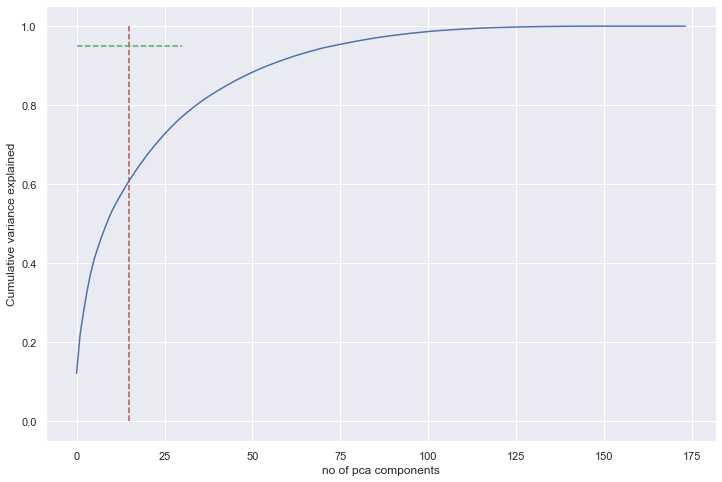

In [139]:
#  feature variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("no of pca components")
plt.show()

In [140]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.113314,0.067659,0.065019,arpu_6
1,0.118059,0.079850,0.133270,arpu_7
2,0.102283,0.108752,0.180893,arpu_8
3,0.113915,-0.038342,0.060504,onnet_mou_6
4,0.118617,-0.033978,0.098613,onnet_mou_7
5,0.112570,-0.011811,0.133405,onnet_mou_8
6,0.135181,0.016307,0.025866,offnet_mou_6
7,0.141194,0.020370,0.073290,offnet_mou_7
8,0.130753,0.046441,0.114154,offnet_mou_8
9,0.026591,0.010904,0.052641,roam_ic_mou_6


In [141]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.18, 21.93, 27.82, 33.1 , 37.43, 41.05, 43.8 , 46.44, 48.8 ,
       51.06, 53.14, 54.84, 56.46, 58.01, 59.54, 60.97, 62.33, 63.66,
       64.95, 66.19, 67.4 , 68.52, 69.61, 70.66, 71.69, 72.71, 73.67,
       74.59, 75.47, 76.33, 77.11, 77.89, 78.62, 79.33, 80.02, 80.7 ,
       81.34, 81.93, 82.51, 83.08, 83.63, 84.16, 84.69, 85.2 , 85.7 ,
       86.18, 86.64, 87.09, 87.52, 87.95, 88.36, 88.77, 89.16, 89.54,
       89.91, 90.26, 90.6 , 90.93, 91.26, 91.58, 91.88, 92.18, 92.48,
       92.75, 93.01, 93.27, 93.52, 93.77, 94.01, 94.25, 94.47, 94.67,
       94.86, 95.05, 95.24, 95.42, 95.6 , 95.77, 95.94, 96.11, 96.28,
       96.44, 96.59, 96.74, 96.89, 97.03, 97.17, 97.3 , 97.43, 97.55,
       97.67, 97.78, 97.89, 97.99, 98.09, 98.19, 98.29, 98.38, 98.47,
       98.56, 98.64, 98.72, 98.8 , 98.87, 98.93, 98.99, 99.05, 99.11,
       99.17, 99.22, 99.27, 99.32, 99.37, 99.42, 99.46, 99.5 , 99.54,
       99.57, 99.6 , 99.63, 99.66, 99.69, 99.72, 99.74, 99.76, 99.78,
       99.8 , 99.82,

# Handling imbalance dataset using Smote 

In [142]:
print("Applying SMOTE to normalize imbalance ")

smote = SMOTE(.8)
trainX_smote,trainY_smote = smote.fit_sample(trainX_scaled,trainY)
print("Shape of train datatset after SMOTE : "+ str(trainX_smote.shape))

# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=80)    
trainX_smote_pca = pca.fit_transform(trainX_smote)
testX_v1_scaled_pca = pca.transform(testX_v1_scaled)

Applying SMOTE to normalize imbalance 
Shape of train datatset after SMOTE : (34689, 174)


In [143]:
print("Shape of train datatset after PCA : "+str(trainX_smote_pca.shape))
from collections import Counter

print(Counter(trainY))
print(Counter(trainY_smote))

Shape of train datatset after PCA : (34689, 80)
Counter({0: 19272, 1: 1737})
Counter({0: 19272, 1: 15417})


In [144]:
from sklearn.model_selection import KFold

# RandomForest

In [145]:
# Random Forest Classifier - parameters = # No Splited Column

cv = KFold(n_splits=4, shuffle=True, random_state=1)

Drf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [12],
    'min_samples_split' : [40],
    'min_samples_leaf' : [10,20],
    'max_features' : [40],
    'n_estimators' : [200]
}

Drf_final_model = GridSearchCV(estimator=Drf,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
Drf_final_model.fit(trainX_smote_pca, trainY_smote)

scores = pd.DataFrame(Drf_final_model.cv_results_)



Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  2.8min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.9min finished


In [146]:
print("Train Accuracy :", accuracy_score(trainY_smote, Drf_final_model.predict(trainX_smote_pca)))
print("Train Confusion Matrix:")
print(confusion_matrix(trainY_smote, Drf_final_model.predict(trainX_smote_pca)))

Train Accuracy : 0.9392891118221914
Train Confusion Matrix:
[[18115  1157]
 [  949 14468]]


# AdaBoost

In [147]:
from sklearn.ensemble import AdaBoostClassifier
#Using adaBoosting to predict 'Attrition' 
Dadaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
Dadaboost.fit(trainX, trainY)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [148]:
print('Accuracy of the Train model is:  ',accuracy_score(trainY, Dadaboost.predict(trainX)))

Accuracy of the Train model is:   0.944642772145271


In [149]:
# Hyperparameter Tuning Adaboost
params = {
        'n_estimators' : [50,100, 200], # no of trees   # eta
        'algorithm': ['SAMME', 'SAMME.R'],
        }

cv = KFold(n_splits=5, shuffle=True, random_state=1)

param_comb = 800

Drandom_search_ada = RandomizedSearchCV(Dadaboost, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=cv, verbose=3, random_state=42)
Drandom_search_ada.fit(trainX, trainY)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.4min remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=1),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=3)

In [150]:
print('Accuracy of the Train model is:  ',accuracy_score(trainY, Drandom_search_ada.predict(trainX)))

Accuracy of the Train model is:   0.941834451901566


# XGBOOST

In [215]:
### XG Boost - Model initial 
# fit model on training data with default hyperparameters

xgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1,learning_rate=.3,subsample=.5)
xgb_model.fit(trainX_scaled, trainY)
# importances = pd.DataFrame(data={
#     'Attribute': X_train.columns,
#     'Importance': model.feature_importances_
# })
# importances = importances.sort_values(by='Importance', ascending=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
# hyperparameter tuning with XGBoost - Model Direct

# creating a KFold object 
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
Dxgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
Dmodel_cv = GridSearchCV(estimator = Dxgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
Dmodel_cv.fit(trainX_smote_pca, trainY_smote)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, vali

In [153]:
# printing the optimal accuracy score and hyperparameters
print('We  get best score of '+str(round(Dmodel_cv.best_score_,2)) +'using parameters`m '+str(Dmodel_cv.best_params_))

We  get best score of 0.89using parameters`m {'learning_rate': 0.3, 'subsample': 0.5}


In [154]:
# chosen hyperparameters - Model 3
params = {'learning_rate': 0.3,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.4,
          'gamma': 1,
         'objective':'binary:logistic'}

# fit model on training data
Dmodel_1 = XGBClassifier(params = params,max_depth=2, n_estimators=200,min_child_weight=1,scale_pos_weight = 1)
Dmodel_1.fit(trainX_smote_pca, trainY_smote)

print('Accuracy of the Train model is:  ',accuracy_score(trainY_smote, Dmodel_1.predict(trainX_smote_pca)))

[13:16:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy of the Train model is:   0.9094237366312088


# Calculate the Test Results based on the multiple model outputs

In [260]:
# Random Forest 
Dchurn_probability_randomforest = Drf_final_model.predict(testX_v1_scaled_pca)
df['Dchurn_probability_randomforest'] = pd.DataFrame(Dchurn_probability_randomforest,columns=['Dchurn_probability_randomforest'])
print(df.shape)


(30000, 15)


In [261]:
# XGBOOST 
Dchurn_XGBOOST = Dmodel_1.predict(testX_v1_scaled_pca)
df['Dchurn_XGBOOST'] = pd.DataFrame(Dchurn_XGBOOST,columns=['Dchurn_XGBOOST'])
print(df.shape)

(30000, 15)


In [262]:
#ADABOOST
# Adaboost
Dchurn_probability_adaboost = random_search_ada.predict(test_v1)
df['Dchurn_probability_adaboost'] = pd.DataFrame(Dchurn_probability_adaboost,columns=['Dchurn_probability_adaboost'])
print(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)

(30000, 15)


In [263]:
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest,churn_probability_adaboost,total_churn,Total_Case1,Dchurn_probability_randomforest,Dchurn_XGBOOST,Dchurn_probability_adaboost,Dtotal_churn,Total_Case2,Total_sum,churn_probability,Dchurn_XGBOOST_new
0,69999,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,70000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70001,0,0,0,1,1,0,0,0,1,1,0,0,0,1
3,70002,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70003,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [264]:
df['Dtotal_churn'] = df['Dchurn_XGBOOST'] + df['Dchurn_probability_adaboost'] + df['Dchurn_probability_randomforest']

In [265]:
df['Total_Case2'] = df['Dtotal_churn'].apply(lambda x : 1 if x>1 else 0)

In [266]:
df['Total_sum'] = df['Total_Case2'] + df['Total_Case1']

In [267]:
df['churn_probability'] = df['Total_sum'].apply(lambda x : 1 if x>=1 else 0)

In [268]:
df['churn_probability'].value_counts()

0    29333
1      667
Name: churn_probability, dtype: int64

In [269]:
df[['id','churn_probability']].to_csv('Submission.csv',index=False)

# Feature Importance using the Xgboost Model

In [270]:
xgb_model.feature_importances_

array([0.00580035, 0.00697219, 0.00522264, 0.00245783, 0.00520968,
       0.00710439, 0.00391755, 0.00368342, 0.00551714, 0.        ,
       0.00515534, 0.00534465, 0.00513043, 0.00451126, 0.01807563,
       0.00417708, 0.00487079, 0.00482656, 0.00477146, 0.00416375,
       0.00859037, 0.00494008, 0.00841419, 0.00783195, 0.00458536,
       0.00539613, 0.0048817 , 0.00492846, 0.0039984 , 0.00594827,
       0.00802058, 0.00660701, 0.00374302, 0.00487527, 0.00397225,
       0.00405025, 0.00431808, 0.        , 0.00335435, 0.00312041,
       0.0028907 , 0.01353951, 0.        , 0.        , 0.        ,
       0.00520313, 0.00401243, 0.0046016 , 0.0069737 , 0.        ,
       0.        , 0.0054371 , 0.00325695, 0.00702449, 0.00428863,
       0.00342811, 0.00423555, 0.00400891, 0.0039257 , 0.01168548,
       0.00333813, 0.00538908, 0.00419665, 0.00402125, 0.00441708,
       0.01183167, 0.00438224, 0.00412395, 0.00391219, 0.003565  ,
       0.0052962 , 0.00469391, 0.00411684, 0.00491977, 0.00472

In [271]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go
import plotly.tools as tls

In [272]:
# Scatter plot
trace = go.Scatter(
y = xgb_model.feature_importances_, x = xtrain.columns.values, mode='markers',
marker=dict(
sizemode = 'diameter',
sizeref = 1.3,
size = 12,
color = xgb_model.feature_importances_, colorscale='Portland', showscale=True
),
text = xtrain.columns.values )
data = [trace]
layout= go.Layout( autosize= True,
title= 'XGBOOST Model Feature Importance', hovermode= 'closest',
xaxis= dict( ticklen= 5,
showgrid=False, zeroline=False, showline=False
), yaxis=dict(
title= 'Feature Importance', showgrid=False, zeroline=False,
ticklen= 5,
gridwidth= 2 ),
showlegend= False )
fig = go.Figure(data=data, layout=layout) 
py.iplot(fig,filename='scatter')

In [220]:
# Top 20 Features based on Feature Selection
#y = model_1.feature_importances_, x = xtrain.columns.values,
results = pd.DataFrame()
results['columns'] = xtrain.columns.values
results['importances'] = xgb_model.feature_importances_ *100
results.sort_values(by = 'importances', ascending = False, inplace=True)
results[:20]

,columns,importances
140,fb_user_8,8.425043
80,total_ic_mou_8,7.373122
95,total_rech_amt_8,2.657227
101,last_day_rch_amt_8,1.928844
14,roam_og_mou_8,1.807563
150,date_of_last_rech_data_8age,1.626946
116,av_rech_amt_data_8,1.599456
157,std_og_mou_diff,1.501348
167,total_rech_amt_diff,1.380293
41,std_og_mou_8,1.353951


# Conclusion
- Telecom company should provide good offers to the customers who are using services from a roaming zone.
- Telecom company should provide some kind of STD and ISD packages to reduce churn rate.